# The Second Part of the Assignment of IDS 2019-2020
Document your results as well as the way you obtained them in this jupyter notebook. Separate reports (pdf, word, etc.) are _not_ required. However, it is necessary that you provide the python code leading to your results as well as textual answers to the assignment questions in this notebook. *DO NOT CLEAR THE OUTPUT of the notebook you are submitting!* In the cases that the result of an algorithm is pdf, jpg, etc, you should attach the result to this notebook file and refer to that in the text.  

Next to the jupyter notebook, submit one zip-file containing all data sets that you are asked to submit. Make sure they are easily identifiable, i.e. use names as requested in the corresponding question.

Do not change the general structure of this notebook, but you can add further markdown or code cells to explain your solutions if necessary. In the end, submit this file and your created data sets in moodle.

Only <font color="red">one </font> group member should upload your group's solution.*Make sure to include group members' names and matriculation numbers*. If your name and student id are not included in the report, you will not receive any points!


Hint 1: While answering the questions, you will get a better and better impression of the given data. <font color="red"><b>Ensure that all claims you make are supported by the presented facts!</b></font>

Hint 2: <font color="red"><b>Some of the tasks might need some time to run. Take this into account in your planning.</b></font>

Hint 3: RWTHonline allows for multiple submissions (each submission overwrites the previous ones). <font color="red"><b>Partial submissions are possible and encouraged. </b></font> This helps in case of technical problems of RWTHonline, which do seldomly happen.

## Preprocessing of the Dataset (5 points)

The provided data set *air_pollution* contains hourly results of measuring the concentration of certain substances (CO, Benzene, NO2, particulate matter) and environmental conditions (temperature, relative humidity, traffic volume). This data was collected near a busy street in a city center by an automated device.

 You should carry out some preprocessing steps before starting the analysis:
 - Select 90% of 'air_pollution' dataset by random sampling. Use one of the group member's student number as a seed.
 - After completing this preprocessing step, export your final dataset as 'air_pollution_2.csv' dataset and use that for the next steps of the assignment.
 - If it is not directly mentioned, you should always use your extracted (above-created) dataset.
 - <font color='red'>Important!</font> Make sure that you submit your extracted dataset with your result in moodle.

In [2]:
#your code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_ap = pd.read_csv("./air_pollution.csv", parse_dates=['Date'])
df_ap2 = df_ap.sample(frac=0.9, random_state=402471)
df_ap2.to_csv("./air_pollution_2.csv", index=False)

## Question 1 - Data Preprocessing and Data Quality (10 points)

For this question, use the extracted data set you created in the preprocessing step ('air_pollution_2.csv'), but without the features *Traffic_Volume* and *Particulate_Matter*. Remove those columns before answering the questions.

In [3]:
#import libraries and data set

#import dataset and remove the corresponding columns
df_q1 = pd.read_csv("./air_pollution_2.csv").drop(columns = ['Traffic_Volume', 'Particulate_Matter'])

(a) We want to get a first impression of the data. To achieve this, compute and show the following:
    - the column names (names of the features)
    - the data type of each feature
    - for time features: the minimum and maximum
    - for numerical (non-time) features: the mean, standard deviation, minimum and maximum
    - for categorical features: the number of classes and the value of the most frequent class

In [4]:
#your code
print('Features Overview:')
# parse time and group numerical features together
feature_time = pd.to_datetime(df_q1['Time']).dt.time
columns_numerical = df_q1[df_q1.columns[2:7]]

# specify the characteristics for each feature
minimum = [df_q1['Date'].min(), feature_time.min().strftime("%H:%M:%S")] + columns_numerical.min().values.tolist()
maximum = [df_q1['Date'].max(), feature_time.max().strftime("%H:%M:%S")] + columns_numerical.max().values.tolist()
mean = ['-', '-'] + columns_numerical.mean().values.tolist()
std = ['-', '-'] + columns_numerical.std().values.tolist()

# form the overview table of all features
features_overview = {'Data Type': df_q1.dtypes, 
                     'Minimum': minimum, 
                     'Maximum': maximum, 
                     'Mean': mean, 
                     'Standard Deviation': std }
pd.DataFrame(data = features_overview).T 


Features Overview:


,Date,Time,CO,Benzene,NO2,Temperature,Humidity(%)
Data Type,object,object,float64,float64,int64,float64,float64
Minimum,2004-01-04,00:00:00,-200,-200,-200,-200,-200
Maximum,2005-12-03,23:00:00,11.9,63.7,340,44.6,88.7
Mean,-,-,-34.4886,1.85591,57.8982,9.80678,39.396
Standard Deviation,-,-,77.8799,41.3511,127.023,43.1851,51.1788


(b) Consider the features 'date' and 'time'. Combine them into a new column 'Datetime' using the datetime data type, and drop the old columns 'date' and 'time'. 

Which of the two representations of date and time do you think is more suitable for most analysis applications?

Explanation: For most analysis applications, the new representation with combined datetime is more suitable, since it is a compact representation of the timestamp, which can be easily dealt with in most programming languages. Moreover, in most cases, timestamp is considered as one feature, thus putting date and time together would reduce complexity without losing much information.

In [27]:
#your code
if {'Date', 'Time'}.issubset(df_q1.columns):
    df_q1['Datetime'] = df_q1['Date'] + ' ' + df_q1['Time']
    df_q1['Datetime'] = pd.to_datetime(df_q1['Datetime'])
    df_q1 = df_q1.drop(columns = ['Date', 'Time'])
    
df_q1.head()

,CO,Benzene,NO2,Temperature,Humidity(%),Datetime
0,4.8,26.0,153,17.5,49.8,2004-11-05 09:00:00
1,5.5,26.3,223,4.1,47.9,2005-08-03 09:00:00
2,6.8,35.9,134,23.0,65.9,2004-10-20 19:00:00
3,2.1,14.0,130,40.1,19.0,2004-07-22 12:00:00
4,-200.0,8.0,-200,21.9,39.4,2004-10-14 11:00:00


(c) For each feature corresponding to a measured value, provide a simple scatter plot showing the data points over time. Can you spot any obvious data quality issues, e.g. inconsistencies, implausible values or missing values (without researching on specific domain knowledge)?

*Hint: you may perform additional computations to verify your findings.*

Text(0.5, 1.0, 'Humidity(%)')

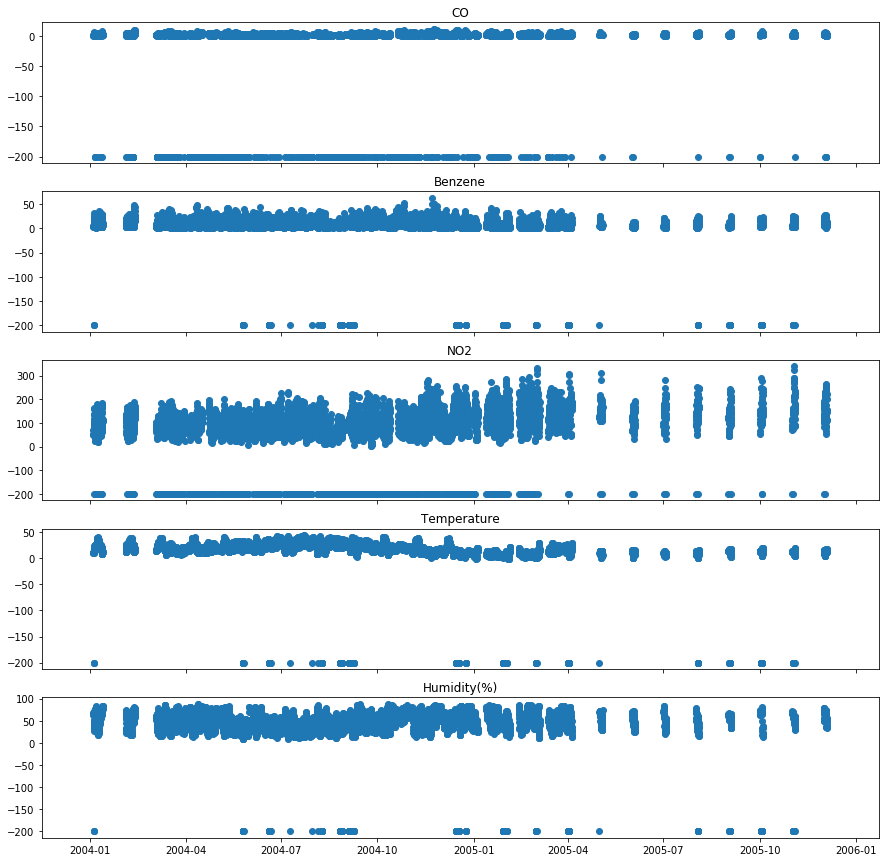

In [28]:
#your code
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, sharex = True, figsize=(15,15))
ax1.scatter(df_q1['Datetime'], df_q1.iloc[:, 0])
ax1.set_title('CO')
ax2.scatter(df_q1['Datetime'], df_q1.iloc[:, 1])
ax2.set_title('Benzene')
ax3.scatter(df_q1['Datetime'], df_q1.iloc[:, 2])
ax3.set_title('NO2')
ax4.scatter(df_q1['Datetime'], df_q1.iloc[:, 3])
ax4.set_title('Temperature')
ax5.scatter(df_q1['Datetime'], df_q1.iloc[:, 4])
ax5.set_title('Humidity(%)')


In [29]:
# check for missing values
print('Dataset contains missing value(s):', df_q1.isnull().values.any())

Dataset contains missing value(s): False


In [30]:
# inspect the negative values in each numercal columns
for column in df_q1.loc[:, df_q1.columns != 'Datetime']:
    print('Unique negative values in', column , 'and frequency: \n', df_q1[column][df_q1[column] < 0].value_counts())


Unique negative values in CO and frequency: 
 -200.0    1526
Name: CO, dtype: int64
Unique negative values in Benzene and frequency: 
 -200.0    329
Name: Benzene, dtype: int64
Unique negative values in NO2 and frequency: 
 -200    1482
Name: NO2, dtype: int64
Unique negative values in Temperature and frequency: 
 -200.0    329
-0.6        2
-0.1        2
-1.3        2
-0.2        1
-1.1        1
-1.9        1
-1.4        1
-0.3        1
-1.2        1
Name: Temperature, dtype: int64
Unique negative values in Humidity(%) and frequency: 
 -200.0    329
Name: Humidity(%), dtype: int64


Explanation: 
- From the scatter plots above, it is obvious that we have some implausible values at the bottom parts. We observe that for all numerical features, there is a clear blank strip between the positive values and the negative value, which is -200. However, this value is not plausible as measurement results in reality. Thus, we consider these data points as noise.

- We then inspected the value(s) below 0 for each numerical features. As is shown above, except for 'Temperature', all other features only have -200 as the only unique negative value with relatively high frequency. As for 'Temperature', a negative value is fairly possible but -200 also appears 329 times. Thus, we can verify that the value -200 is noise and implausible.

(d) We need to handle any implausible or missing data. In the lecture, several strategies to do so have been introduced, for example, deleting data rows that contain missing/implausible values or replacing them by a value derived from other data points. 

In this question, consider implausible values to be the ones identified in question (c).

    1) For all numerical features, compute and show mean, standard deviation, minimum and maximum, while ignoring the missing and implausible values. Also, print the total number of data rows.
    
    2) Choose a strategy (or combination of strategies) to handle missing/implausible values. Create a cleaned data set with all those values handled accordingly.
    
    3) For all numerical features, compute and show mean, standard deviation, minimum and maximum with respect to your cleaned data set. Also print the total number of data rows.
    
    4) Motivate and explain your strategy and describe its (dis-)advantages compared to other options. Compare the computed statistical values before and after cleaning and briefly describe and evaluate any changes.

In [31]:
#your code
mean_cleaned, sd_cleaned, min_cleaned, max_cleaned, row_nums = [], [], [], [], []

# compute the statistical characteristics of each feature
for column in df_q1.loc[:, df_q1.columns != 'Datetime']:
    column_cleaned = df_q1[column][df_q1[column] != -200]
    mean_cleaned.append(column_cleaned.mean())
    sd_cleaned.append(column_cleaned.std())
    min_cleaned.append(column_cleaned.min())
    max_cleaned.append(column_cleaned.max())
    row_nums.append(len(column_cleaned))
    
# form the overview table of cleaned features
cleaned_overview = { 'Mean': mean_cleaned, 
                     'Minimum': min_cleaned, 
                     'Maximum': max_cleaned, 
                     'Standard Deviation': sd_cleaned,
                     'Number of Rows': row_nums }

cleaned_table = pd.DataFrame(data = cleaned_overview).round(2).T 
cleaned_table.columns = df_q1.loc[:, df_q1.columns != 'Datetime'].columns
print('Overview of each feature after cleaning')
cleaned_table

Overview of each feature after cleaning


,CO,Benzene,NO2,Temperature,Humidity(%)
Mean,2.14,10.06,112.98,18.34,49.13
Minimum,0.10,0.10,2.00,-1.90,9.20
Maximum,11.90,63.70,340.00,44.60,88.70
Standard Deviation,1.45,7.43,48.37,8.84,17.34
Number of Rows,6895.00,8092.00,6939.00,8092.00,8092.00


In [32]:
# inspecting the noise data points in 'Benzene', 'Temperature', and 'Humidity(%)'
noise_Benzene = df_q1[df_q1['Benzene'] == -200]
print('Entries with noise in feature Benzene:')
print(noise_Benzene)
print('Unique value and frequency in Temperature in the above table:', noise_Benzene['Temperature'].value_counts())
print('Unique value and frequency in Humidity(%) in the above table::', noise_Benzene['Humidity(%)'].value_counts())


Entries with noise in feature Benzene:
         CO  Benzene  NO2  Temperature  Humidity(%)            Datetime
20      7.3   -200.0  214       -200.0       -200.0 2004-12-15 18:00:00
121     1.7   -200.0  129       -200.0       -200.0 2005-05-01 00:00:00
146  -200.0   -200.0 -200       -200.0       -200.0 2004-05-26 06:00:00
184     6.2   -200.0  243       -200.0       -200.0 2005-10-02 19:00:00
236     1.7   -200.0   95       -200.0       -200.0 2004-06-19 22:00:00
...     ...      ...  ...          ...          ...                 ...
8329    3.7   -200.0  177       -200.0       -200.0 2004-12-17 14:00:00
8332    4.2   -200.0  182       -200.0       -200.0 2005-03-01 20:00:00
8354    1.2   -200.0   83       -200.0       -200.0 2004-12-15 07:00:00
8372 -200.0   -200.0 -200       -200.0       -200.0 2004-08-09 11:00:00
8405    5.6   -200.0  157       -200.0       -200.0 2004-12-24 21:00:00

[329 rows x 6 columns]
Unique value and frequency in Temperature in the above table: -200.0    3

Explanation: 

- From the inspection of noise data points, we observe that the noise frequency in 'Benzene', 'Temperature', 'Humidity(%)' are exactly the same(which is 329). This means that it could be possible that when noise occurs in one feature, it also occurs in the other two at the same time. After further inspection, we find out that this is indeed the case. Since these 329 data points only takes up less than 4% among all the 8421 points, and have a high concentration of errors, we simply remove them from the data set.

- On the other hand, the 1526 noise values in 'CO' and 1482 noise values in 'NO2' do not always appear at the same time. These instances takes up around 36% of the entire data set and do have valid values in the remaining features, simply casting them away would lead to a relatively significant information loss. Therefore, we repair the implausible values by replacing them with the corresponding mean value of the regarding feature.

- By combining the above strategies instead of simply removing all rows or even features containing noise, we can avoid losing too much information over the dataset and reconstruct the true data distribution in a plausible way. However, we do face the problem of certain amount of information loss, which is unfortunately inevitable in our case, for example, the actual maximum in 'NO2' is wiped out during the cleaning process. Furthermore, replacing with the mean values does not necessarily guarantee an unbiased representation of the true data distribution.


Comparison after cleaning:

1) The minimum values of each feature offers a more accurate evaluation, since the value was -200 for all features, which hardly describes the true distribution of the measured values of each feature 

2) The maximum values remain mostly unchanged, except for 'NO2'. This is the because the actual maximum for 'NO2' is contained within an instance with heavy noise and got dropped out during cleaning. 

3) The mean values are significantly higher and make more sense after cleaning. The original means are heavily influenced by the noise, since the absolute value of the noise is much bigger than the actual measured values in each feature.

4) The standard diviation(std) is also significantly smaller. This is due to the fact that after cleaning, the massive gap between the actual values and the noise no longer exists. As a result, the variation of values becomes much smaller.

In [6]:

# drop the 329 rows with noise in 'Benzene', 'Temperature', and 'Humidity(%)'
df_cleaned = df_q1[df_q1['Benzene'] != -200]

# replace the rows with noise in 'CO' and 'NO2' with mean values (2.14 and 112.98)
df_cleaned['CO'] = df_cleaned['CO'].replace(-200, 2.14)
df_cleaned['NO2'] = df_cleaned['NO2'].replace(-200, 112.98)

# overview of the cleaned dataset
df_cleaned.describe().round(2).drop(['25%', '50%', '75%'])


## Question 2 - Data Preprocessing  and Advanced Visualization (15 points)

For this question, use the extracted data set you created in the preprocessing step ('air_pollution_2.csv').

(a) To create a suitable input for the following questions, modify the data set as listed below and then print the first 5 data rows:

    - Remove the columns 'Traffic_Volume' and 'Particulate_Matter'
    - Replace the columns 'Date' and 'Time' by a combined column 'Datetime' using the datetime data type
    - Restrict the data to the timeframe between 2004-04-01 and 2005-03-31
    - Drop all rows that contain a missing value or a value below -37
    
*Hint: You may be able to reuse some of your code or data sets created above.*

In [7]:
#your code

# read data and drop columns
df_q2 = pd.read_csv("./air_pollution_2.csv").drop(columns = ['Traffic_Volume', 'Particulate_Matter'])

# merge 'Date' and 'Time'
if {'Date', 'Time'}.issubset(df_q2.columns):
    df_q2['Datetime'] = df_q2['Date'] + ' ' + df_q2['Time']
    df_q2['Datetime'] = pd.to_datetime(df_q2['Datetime'])
    df_q2 = df_q2.drop(columns = ['Date', 'Time'])

# restrict the time frame
df_q2 = df_q2[(df_q2['Datetime'] >= '2004-04-01') & (df_q2['Datetime'] <= '2005-03-31')]

# drop missing values and correct values
df_q2 = df_q2.dropna()
df_q2 = df_q2[(df_q2.loc[:, df_q2.columns != 'Datetime'] >= -37).all(axis=1)]

df_q2.head(5)

,CO,Benzene,NO2,Temperature,Humidity(%),Datetime
0,4.8,26.0,153,17.5,49.8,2004-11-05 09:00:00
2,6.8,35.9,134,23.0,65.9,2004-10-20 19:00:00
3,2.1,14.0,130,40.1,19.0,2004-07-22 12:00:00
5,0.6,1.6,86,8.0,68.9,2005-03-16 05:00:00
6,2.3,14.1,82,20.0,56.7,2004-06-11 11:00:00


(b) For temperature, humidity and CO compute the mean value for each month. Create two stream graphs based on this newly computed data, that visualize the change in temperature, CO and humidity over the months:

    1) For the first stream graph, simply use the mean values you computed for each month.
    
    2) For the second stream graph, first normalize the computed mean values by mapping them individually to an interval between 0 and 1, that is, apply Min-max normalization.

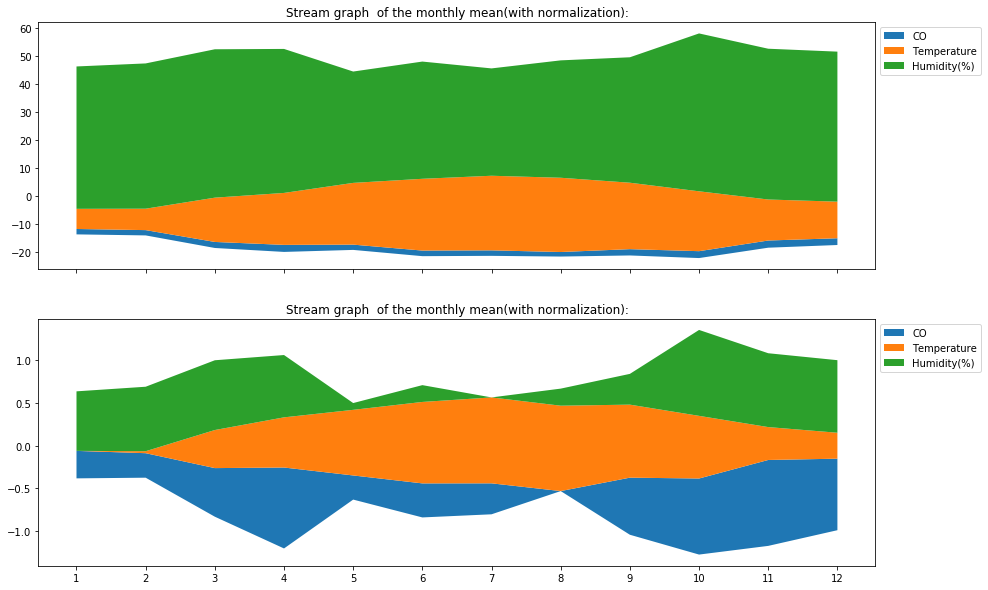

In [13]:
#your code
from sklearn import preprocessing

# group the values and compute the corresponding mean
monthly_mean = df_q2.drop(['Benzene', 'NO2'], axis = 1).groupby([df_q2['Datetime'].dt.month]).mean()

# normalize the monthly mean
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(monthly_mean.values)
monthly_mean_normalized = pd.DataFrame(x_scaled, columns = ['CO', 'Temperature', 'Humidity(%)'], index = list(range(1,13)))

# create stream graph to visualize the original monthly mean
fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize=(15,10))
ax1.stackplot(monthly_mean.index, monthly_mean['CO'], monthly_mean['Temperature'], monthly_mean['Humidity(%)'], baseline='wiggle')
ax1.legend(['CO', 'Temperature', 'Humidity(%)'], loc='upper left', bbox_to_anchor=(1, 1))
ax1.set_title('Stream graph  of the monthly mean(with normalization):')

# create stream graph to visualize the normalized monthly mean
ax2.stackplot(monthly_mean_normalized.index, monthly_mean_normalized['CO'], monthly_mean_normalized['Temperature'], monthly_mean_normalized['Humidity(%)'], baseline='wiggle')
ax2.legend(['CO', 'Temperature', 'Humidity(%)'], loc='upper left', bbox_to_anchor=(1, 1))
ax2.set_title('Stream graph  of the monthly mean(with normalization):')
plt.xticks(monthly_mean.index)
plt.show()

(c) Answer the following questions based on the stream graphs created in question 2(a) and briefly explain how you derived the answer. Which of the two stream graphs do you consider more adequate to obtain the answers?

    1) In which month is the average CO lowest?
    
    2) Is there any correlation between humidity and CO?
    
    3) Between which months is temperature increasing?

Explanation:

1) The average CO is lowest in the 8th month, namely Augst. Since the values are normalized between 0 and 1, the smallest average of CO is mapped to 0. We observe from the the second graph that blue part(CO) disappears at the tick 8 on the x-axis, which indicates that the value of average CO does not contribute to the stacked value, and thus is 0. The normalized graph is more adequate in this case.

2) Yes, correlation between CO and Humidity can be observed in the 2nd graph. In the first one, the two features have the some tendency of increasing and dropping, but it is not clear if they occur together. While in the second graph, the percentages that the two features take up are similar in most months. In this case, the second graph is more adequate, since it offers a more intuitive way for comparison.

3) The temperature is increasing roughly between the 2nd month to the 7th month. This can be observed from the second graph, where the orange part has the tendency of increasing. The second graph would thus be the more adequate one. 

(d) We want to create a heat map that visualizes the CO measured for different combinations of humidity and temperature. 
The heatmap should have 12 columns and 12 rows. The shown CO value should be the *median* of all values for the combination of humidity and temperature.

Modify the data as needed. Use a binning strategy of your choice for converting numerical data to categorical data. Motivate and explain all your choices and modifications.

In [16]:
#your code

# select the relative columns
df_q2d = df_q2[['CO', 'Temperature', 'Humidity(%)']]

# specify the 12 bins seperately for 'Temperature' and 'Humidity(%)'
# we use equal-width binning for its interpretation are more intuitive
bins_temp = np.linspace(df_q2d['Temperature'].min(), df_q2d['Temperature'].max(), 13)
bins_humid = np.linspace(df_q2d['Humidity(%)'].min(), df_q2d['Humidity(%)'].max(), 13)

# group data by 'Temperature' and 'Humidity(%)' and form the dataframe
groups = df_q2d.groupby([pd.cut(df_q2d['Temperature'],bins_temp), pd.cut(df_q2d['Humidity(%)'],bins_humid)])

# take the median for 'CO' for each group
df_heatmap = groups.median()['CO'].reset_index()
df_heatmap 

,Temperature,Humidity(%),CO
0,"(-1.9, 1.975]","(9.2, 15.825]",NaN
1,"(-1.9, 1.975]","(15.825, 22.45]",NaN
2,"(-1.9, 1.975]","(22.45, 29.075]",NaN
3,"(-1.9, 1.975]","(29.075, 35.7]",0.9
4,"(-1.9, 1.975]","(35.7, 42.325]",0.6
...,...,...,...
139,"(40.725, 44.6]","(55.575, 62.2]",NaN
140,"(40.725, 44.6]","(62.2, 68.825]",NaN
141,"(40.725, 44.6]","(68.825, 75.45]",NaN
142,"(40.725, 44.6]","(75.45, 82.075]",NaN


(e) Use the modified data to create a heat map as specified in question part (c). Answer the following questions based on that heat map and briefly explain how you derived your answer:

    1) For which combination of humidity and temperature values is the median CO highest? 
    
    2) How do you explain empty fields in your heat map?
    
    3) Is CO correlating with temperature, humidity, or both?

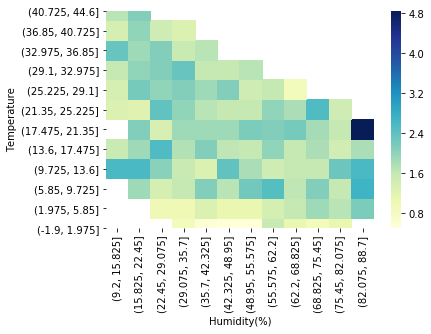

In [17]:
#your code
import seaborn as sns
# form the dataframe for visualization
result = df_heatmap.pivot(index='Temperature', columns='Humidity(%)', values='CO')
# visualize the data and invert the y-axis for easier interpretation
sns.heatmap(result, cmap="YlGnBu").invert_yaxis()

Explanation:

1) The median of CO is highest when Temperature is between (17.475, 21.35] and the Humidity is between (82.075, 88.7]. This can be concluded from the deep blue grid at the center right position, whose color indicates the highest value.

2) In order to construct the heatmap, we need all combinitions of bins for Temperature and Humidity, it is possible that two combined intervals does not show up at the same time in the actual data, and thus do not have the corresponding values for CO. In this case, the median would not exist(NAN), and thus leading to the empty fields.

3) We observe no obvious correlation between (CO, Temperature), (CO, Humidity), or (CO, Humidity & Temperature). The intensity of the colors are generally equaly distributed, and there is no clear indication that it is increasing or decreasing in a certain direction.


## Question 3 - Clustering (15 points): 

(a) For this question, use the extracted data set you created in the preprocessing step ('air_pollution_2.csv'). Use a scatter diagram to find the relation between the 'Traffic_Volume' and 'Particulate_Matter' columns.

Text(0, 0.5, 'Particulate_Matter')

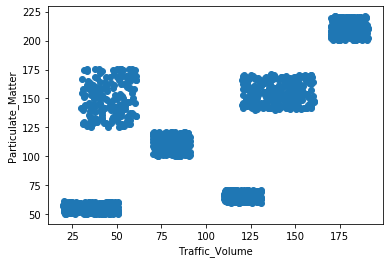

In [38]:
# Your code
df_q3 = pd.read_csv("./air_pollution_2.csv")

# plot the two features
plt.scatter(df_q3['Traffic_Volume'], df_q3['Particulate_Matter'])
plt.xlabel('Traffic_Volume')
plt.ylabel('Particulate_Matter')

(b) From the previous question you found the relationship between two columns which are suitable for applying clustering methods. Find the two arrays corresponding to these to columns and drop nan values from them. Apply the k_means method for clustering the two mentioned columns. Use three different number of clusters for classifying.

In [39]:
# Your code
from sklearn.cluster import KMeans

# form the dataset for clustering
traffic_volumn = df_q3['Traffic_Volume'].dropna().values
particulate_matter = df_q3['Particulate_Matter'].dropna().values

data_clustering = np.array(list(zip(traffic_volumn, particulate_matter)))

cluster_nums = [4, 6, 8]

# apply k-means with k=4
kmeans_a = KMeans(cluster_nums[0]).fit(data_clustering)
clusters_a = kmeans_a.labels_
centroids_a = kmeans_a.cluster_centers_

# apply k-means with k=6
kmeans_b = KMeans(cluster_nums[1]).fit(data_clustering)
clusters_b = kmeans_b.labels_
centroids_b = kmeans_b.cluster_centers_

# apply k-means with k=8
kmeans_c = KMeans(cluster_nums[2]).fit(data_clustering)
clusters_c = kmeans_c.labels_
centroids_c = kmeans_c.cluster_centers_

(c) Apply the DBSCAN method for clustering the two mentioned columns. Use three different eps and min_samples for clustering.

In [40]:
# Your code
from sklearn.cluster import DBSCAN

# apply DBSCAN with the 1st set of parameters
dbscan = DBSCAN(eps = 5, min_samples=5).fit(data_clustering)
clusters_1 = dbscan.labels_
cluster_indexs_1 = np.unique(clusters_1).tolist()

# apply DBSCAN with the 2nd set of parameters
dbscan = DBSCAN(eps = 10, min_samples=10).fit(data_clustering)
clusters_2 = dbscan.labels_
cluster_indexs_2 = np.unique(clusters_2).tolist()

# apply DBSCAN with the 3rd set of parameters
dbscan = DBSCAN(eps = 30, min_samples=30).fit(data_clustering)
clusters_3 = dbscan.labels_
cluster_indexs_3 = np.unique(clusters_3).tolist()

(d) Compare k_means and DBSCAN results. Which of these methods is more suitable for clustering this data? Why?

Text(0.5, 1.0, 'DBSCAN with eps=30 & min_samples=30')

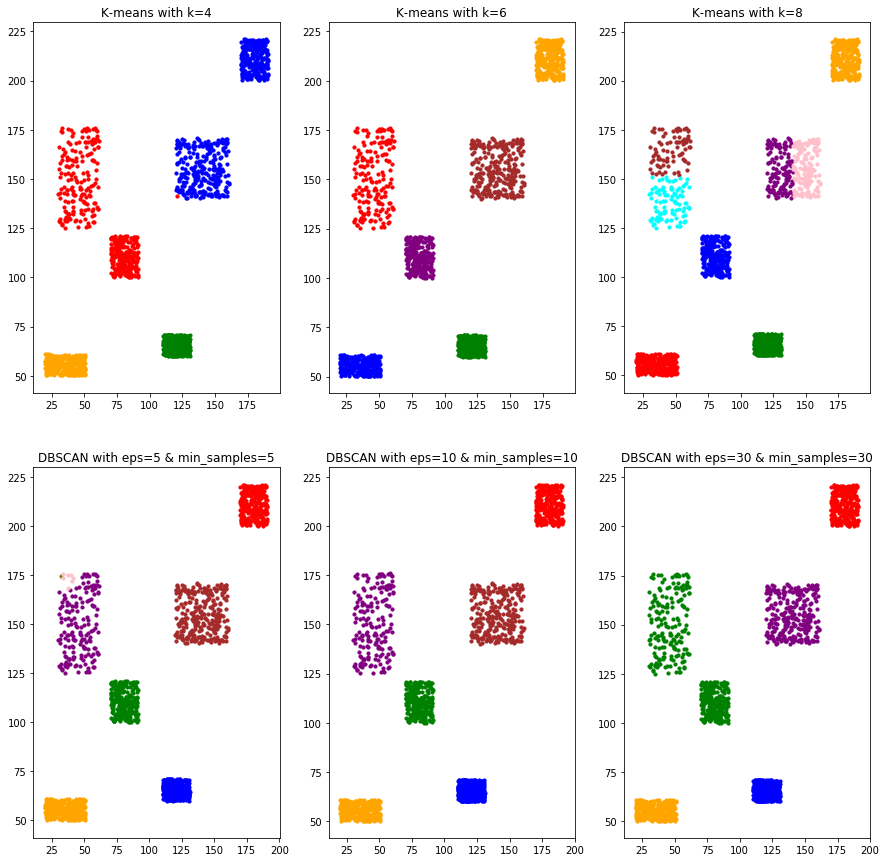

In [41]:
# Your code
fig, axs = plt.subplots(2, 3, figsize=(15,15))

colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'cyan', 'olive']

# visualize the results from k-means
for cluster_index in range(cluster_nums[0]) :
    sub_set = np.array([data_clustering[i] for i in range(len(data_clustering)) if clusters_a[i] == cluster_index])
    if len(sub_set) == 0 :
        continue
    axs[0,0].scatter(sub_set[:,0], sub_set[:,1], s = 10, c = colors[cluster_index])
axs[0,0].set_title('K-means with k=4')

for cluster_index in range(cluster_nums[1]) :
    sub_set = np.array([data_clustering[i] for i in range(len(data_clustering)) if clusters_b[i] == cluster_index])
    if len(sub_set) == 0 :
        continue
    axs[0,1].scatter(sub_set[:,0], sub_set[:,1], s = 10, c = colors[cluster_index])
axs[0,1].set_title('K-means with k=6')

for cluster_index in range(cluster_nums[2]) :
    sub_set = np.array([data_clustering[i] for i in range(len(data_clustering)) if clusters_c[i] == cluster_index])
    if len(sub_set) == 0 :
        continue
    axs[0,2].scatter(sub_set[:,0], sub_set[:,1], s = 10, c = colors[cluster_index])
axs[0,2].set_title('K-means with k=8')

# plot the results from DBSCAN
for cluster_index in cluster_indexs_1 :
    sub_set = np.array([data_clustering[i] for i in range(len(data_clustering)) if clusters_1[i] == cluster_index])
    if len(sub_set) == 0 :
        continue
    axs[1,0].scatter(sub_set[:,0], sub_set[:,1], s = 10, c = colors[cluster_index])
axs[1,0].set_title('DBSCAN with eps=5 & min_samples=5')
    
for cluster_index in cluster_indexs_2 :
    sub_set = np.array([data_clustering[i] for i in range(len(data_clustering)) if clusters_2[i] == cluster_index])
    if len(sub_set) == 0 :
        continue
    axs[1,1].scatter(sub_set[:,0], sub_set[:,1], s = 10, c = colors[cluster_index])
axs[1,1].set_title('DBSCAN with eps=10 & min_samples=10')
    
for cluster_index in cluster_indexs_3 :
    sub_set = np.array([data_clustering[i] for i in range(len(data_clustering)) if clusters_3[i] == cluster_index])
    if len(sub_set) == 0 :
        continue
    axs[1,2].scatter(sub_set[:,0], sub_set[:,1], s = 10, c = colors[cluster_index])
axs[1,2].set_title('DBSCAN with eps=30 & min_samples=30')

Explanation:

We would argue that for this dataset, DBSCAN would be a better method for clustering. The cluster numbers in k-means need to be user-defined. This would require some pre-knowledge about the dataset, since this method is highly sensitive to the given k-value. For example, when we set k=8, the purple points and cyan points, which intuitively belong to the same cluster, got splitted into two clusters. While in the results from DBSCAN, the overall performance seems to be more stable.
Moreover, based on the plot we can see that the density of each cluster is a suitable criteria than the distance between clusters for separating the data.

(e) Add noise to the two mentioned columns. For adding noise, first find the range of these two columns and add a random number of 30 samples of noise in the range of each column to that. Plot the scatter diagram again.
Repeat k_means and DBSCAN algorithms for clustering. Which of these methods is more suitable for clustering this data? Why?

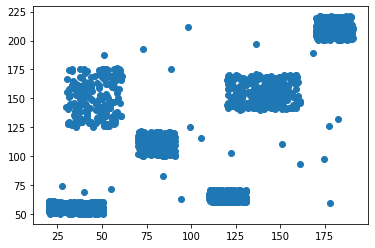

In [42]:
# Your code
# find out the range of both columns
range_tv = [traffic_volumn.min(), traffic_volumn.max()]
range_pm = [particulate_matter.min(), particulate_matter.max()]

# add noise points to the columns and form the data
traffic_volumn_noise = np.append(traffic_volumn, np.random.uniform(range_tv[0], range_tv[1], 30))
particulate_matter_noise = np.append(particulate_matter, np.random.uniform(range_pm[0], range_pm[1], 30))
data_clustering_noise = np.array(list(zip(traffic_volumn_noise, particulate_matter_noise)))

# plot the noisy data
plt.scatter(traffic_volumn_noise, particulate_matter_noise)

Text(0.5, 1.0, 'DBSCAN with eps=30 & min_samples=30')

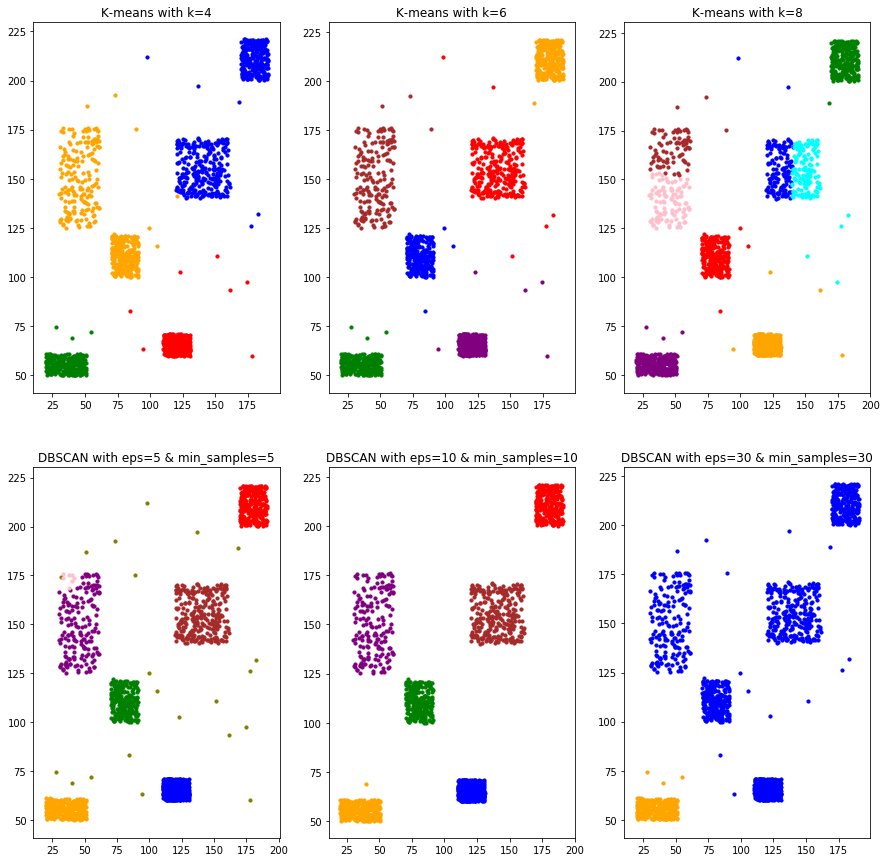

In [43]:
# apply k-means on the noisy data
# apply k-means with k=4
kmeans_a_noise = KMeans(cluster_nums[0]).fit(data_clustering_noise)
clusters_a_noise = kmeans_a_noise.labels_
centroids_a_noise = kmeans_a_noise.cluster_centers_

# apply k-means with k=6
kmeans_b_noise = KMeans(cluster_nums[1]).fit(data_clustering_noise)
clusters_b_noise = kmeans_b_noise.labels_
centroids_b_noise = kmeans_b_noise.cluster_centers_

# apply k-means with k=8
kmeans_c_noise = KMeans(cluster_nums[2]).fit(data_clustering_noise)
clusters_c_noise = kmeans_c_noise.labels_
centroids_c_noise = kmeans_c_noise.cluster_centers_

# apply DBSCAN 
# apply DBSCAN with the 1st set of parameters
dbscan = DBSCAN(eps = 5, min_samples=5).fit(data_clustering_noise)
clusters_1_noise = dbscan.labels_
cluster_indexs_1_noise = np.unique(clusters_1).tolist()

# apply DBSCAN with the 2nd set of parameters
dbscan = DBSCAN(eps = 10, min_samples=10).fit(data_clustering_noise)
clusters_2_noise = dbscan.labels_
cluster_indexs_2_noise = np.unique(clusters_2).tolist()

# apply DBSCAN with the 3rd set of parameters
dbscan = DBSCAN(eps = 30, min_samples=30).fit(data_clustering_noise)
clusters_3_noise = dbscan.labels_
cluster_indexs_3_noise = np.unique(clusters_3).tolist()

# visualize the results
fig, axs = plt.subplots(2, 3, figsize=(15,15))
# visualize the results from k-means
for cluster_index in range(cluster_nums[0]) :
    sub_set = np.array([data_clustering_noise[i] for i in range(len(data_clustering_noise)) if clusters_a_noise[i] == cluster_index])
    if len(sub_set) == 0 :
        continue
    axs[0,0].scatter(sub_set[:,0], sub_set[:,1], s = 10, c = colors[cluster_index])
axs[0,0].set_title('K-means with k=4')

for cluster_index in range(cluster_nums[1]) :
    sub_set = np.array([data_clustering_noise[i] for i in range(len(data_clustering_noise)) if clusters_b_noise[i] == cluster_index])
    if len(sub_set) == 0 :
        continue
    axs[0,1].scatter(sub_set[:,0], sub_set[:,1], s = 10, c = colors[cluster_index])
axs[0,1].set_title('K-means with k=6')

for cluster_index in range(cluster_nums[2]) :
    sub_set = np.array([data_clustering_noise[i] for i in range(len(data_clustering_noise)) if clusters_c_noise[i] == cluster_index])
    if len(sub_set) == 0 :
        continue
    axs[0,2].scatter(sub_set[:,0], sub_set[:,1], s = 10, c = colors[cluster_index])
axs[0,2].set_title('K-means with k=8')

# plot the results from DBSCAN
for cluster_index in cluster_indexs_1_noise :
    sub_set = np.array([data_clustering_noise[i] for i in range(len(data_clustering_noise)) if clusters_1_noise[i] == cluster_index])
    if len(sub_set) == 0 :
        continue
    axs[1,0].scatter(sub_set[:,0], sub_set[:,1], s = 10, c = colors[cluster_index])
axs[1,0].set_title('DBSCAN with eps=5 & min_samples=5')
    
for cluster_index in cluster_indexs_2_noise :
    sub_set = np.array([data_clustering_noise[i] for i in range(len(data_clustering_noise)) if clusters_2_noise[i] == cluster_index])
    if len(sub_set) == 0 :
        continue
    axs[1,1].scatter(sub_set[:,0], sub_set[:,1], s = 10, c = colors[cluster_index])
axs[1,1].set_title('DBSCAN with eps=10 & min_samples=10')
    
for cluster_index in cluster_indexs_3_noise :
    sub_set = np.array([data_clustering_noise[i] for i in range(len(data_clustering_noise)) if clusters_3_noise[i] == cluster_index])
    if len(sub_set) == 0 :
        continue
    axs[1,2].scatter(sub_set[:,0], sub_set[:,1], s = 10, c = colors[cluster_index])
axs[1,2].set_title('DBSCAN with eps=30 & min_samples=30')

Explanation: We think DBSCAN is a better choice in this case, since it has the advantage of automatically removing noise points if provided with suitable parameters(such as in the middle graph in the bottom row), while k-means also assign noises to clusters. Moreover, results of k-means still have the problem of high dependency on user-defined k-value, while the results of DBSCAN are still reasonable with respect to parameter changes, since they are based on density.

## Question 4 - Frequent itemsets and association rules (15 points): 

(a) You should carry out some preprocessing steps before starting the analysis:
 - Select 90% of 'applications' dataset by random sampling. Use one of the group member's student number as a seed.
 - After completing this preprocessing step, export your final dataset as 'applications_2.csv' dataset and use that for the next steps of the assignment.
 - <font color='red'>Important!</font> Make sure that you submit your extracted dataset with your result in moodle.

In [29]:
import pandas as pd
df_applications = pd.read_csv("./applications.csv", low_memory=False, header=None)
df_applications_2 = df_applications.sample(frac=0.9, random_state=402471)
df_applications_2.to_csv("./applications_2.csv", index=False)

(b) Find the most frequent itemsets with the support of more than 0.4 by using the Apriori algorithm (Hint: When you are creating rows to make the data_set, you should use none_empty strings).

In [30]:
# Your code
import csv
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder

df_q4 = []

with open("./applications_2.csv") as csvFile:
    reader = csv.reader(csvFile)
    for i,row in enumerate(reader):
        # ignore the header index
        if i > 0:
            #delete all the empty strings in item
            while '' in row:
                row.remove('')
            df_q4.append(row)
                                         
te = TransactionEncoder()
te_ary = te.fit(df_q4).transform(df_q4)
data = pd.DataFrame(te_ary, columns = te.columns_)
frequent_itemsets = apriori(data, min_support = 0.4, use_colnames = True)
frequent_itemsets.sort_values(by='support',ascending=False,inplace=True)
# print(frequent_itemsets)
frequent_itemsets

,support,itemsets
3,1.000000,(A_SUBMITTED)
8,1.000000,"(A_PARTLYSUBMITTED, A_SUBMITTED)"
1,1.000000,(A_PARTLYSUBMITTED)
0,0.583970,(A_DECLINED)
5,0.583970,"(A_PARTLYSUBMITTED, A_DECLINED)"
6,0.583970,"(A_SUBMITTED, A_DECLINED)"
13,0.583970,"(A_PARTLYSUBMITTED, A_SUBMITTED, A_DECLINED)"
12,0.562065,"(W_Completeren aanvraag, A_SUBMITTED)"
17,0.562065,"(A_PREACCEPTED, W_Completeren aanvraag, A_SUBM..."
16,0.562065,"(A_PARTLYSUBMITTED, W_Completeren aanvraag, A_..."


(c) Find the most frequent itemsets with the support of more than 0.4 by using the Apriori algorithm having more than 2 members.

In [35]:
frequent_itemsets[frequent_itemsets.itemsets.apply(lambda x: len(x)) > 2] 

,support,itemsets
13,0.583970,"(A_PARTLYSUBMITTED, A_SUBMITTED, A_DECLINED)"
17,0.562065,"(A_PREACCEPTED, W_Completeren aanvraag, A_SUBM..."
16,0.562065,"(A_PARTLYSUBMITTED, W_Completeren aanvraag, A_..."
15,0.562065,"(A_PREACCEPTED, A_PARTLYSUBMITTED, W_Completer..."
14,0.562065,"(A_PREACCEPTED, A_PARTLYSUBMITTED, A_SUBMITTED)"
18,0.562065,"(A_PREACCEPTED, A_PARTLYSUBMITTED, W_Completer..."


(d) Find the itemsets having min_confidence=0.3 and min_lift=1.2. Print support, confidence and lift of filtered rules in one table.

In [33]:
from mlxtend.frequent_patterns import association_rules as arule
arule(frequent_itemsets, metric="confidence", min_threshold=0.3)
rules = arule(frequent_itemsets, metric="lift", min_threshold=1.2)
result = rules[['antecedents','consequents','support','confidence','lift']]
result

,antecedents,consequents,support,confidence,lift
0,"(A_PREACCEPTED, A_SUBMITTED)",(W_Completeren aanvraag),0.562065,1.0,1.779154
1,"(W_Completeren aanvraag, A_SUBMITTED)",(A_PREACCEPTED),0.562065,1.0,1.779154
2,(A_PREACCEPTED),"(W_Completeren aanvraag, A_SUBMITTED)",0.562065,1.0,1.779154
3,(W_Completeren aanvraag),"(A_PREACCEPTED, A_SUBMITTED)",0.562065,1.0,1.779154
4,"(A_PREACCEPTED, A_PARTLYSUBMITTED)",(W_Completeren aanvraag),0.562065,1.0,1.779154
5,"(A_PARTLYSUBMITTED, W_Completeren aanvraag)",(A_PREACCEPTED),0.562065,1.0,1.779154
6,(A_PREACCEPTED),"(A_PARTLYSUBMITTED, W_Completeren aanvraag)",0.562065,1.0,1.779154
7,(W_Completeren aanvraag),"(A_PREACCEPTED, A_PARTLYSUBMITTED)",0.562065,1.0,1.779154
8,(A_PREACCEPTED),(W_Completeren aanvraag),0.562065,1.0,1.779154
9,(W_Completeren aanvraag),(A_PREACCEPTED),0.562065,1.0,1.779154


## Question 5 - Text Mining (15 points)

Among the datasets given for this assignment you will find the files "pg_train" and "pg_test". These two files contain a labeled corpus, already splitted in training and test set.
The corpus consists of sentences from several novels, labeled with the name of the author. The first task is text classification: you will train a set of classifiers that predict the author of a piece of text.

(a) Perform preprocessing on the training corpus (all lowercase, no punctuation, tokenization, stemming, stopword removal) and obtain a binary document-term matrix; train a logistic classifier with the author as target.

In [1]:
# Your code
import csv
import pandas as pd
from nltk.tokenize import  word_tokenize
import string
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re

train_corpus = [] # store the texts
train_labels = [] # store the corresponding author name
with open('./pg_train.csv','rt',encoding='ISO-8859-1',errors='ignore') as f:
    docs = csv.reader(f)
    for doc in docs:
        if doc:
            # split author and corresponding text
            author = str(doc).split('#')[0]
            #match the author name(drop the other puntuations)
            label = re.search(r'[a-z]+',author).group()
            train_labels.append(label)
            text = str(doc).split('#')[1]
            train_corpus.append(text)
#Datapreprocessing            
def handle(train_corpus):
    stemmer = PorterStemmer()
    puncts = list(string.punctuation)+['``']
    # store the handled text from train_corpus
    handled_corpus = []
    
    for text in train_corpus:
        #tokenization
        words = word_tokenize(text)
        #lowercase
        lower_words = [word.lower() for word in words]
        #delete all punctuations and numbers
        for word in lower_words:
            if word in puncts:
                lower_words.remove(word)
        for word in lower_words:
            if re.match('^[a-z]|[A-Z]',word) == None:
                lower_words.remove(word)
        #stemming
        new_words = [stemmer.stem(word) for word in lower_words]
        #stopword removal
        filtered_words = [word for word in new_words if word not in stopwords.words('english')]
        filtered_text = ' '.join(filtered_words)
        handled_corpus.append(filtered_text)
    return handled_corpus

handled_corpus = handle(train_corpus)
handled_train = pd.DataFrame({'author':train_labels,'text':handled_corpus})
# store the preprocessed data
handled_train.to_csv('./handled_train.csv',index=False)

In [34]:
import pandas as pd
import warnings
warnings.simplefilter('ignore')

train = pd.read_csv('./handled_train.csv')
print(train.head(),'\n')
print('length of corpus:',len(train))

from sklearn.feature_extraction.text import CountVectorizer
# construct binary document_term matrix
count_vect = CountVectorizer(binary=True,analyzer='word')
X_train_binary = count_vect.fit_transform(train['text'])
# print('train result: \n',X_train_binary)
binary_doc_term = X_train_binary.toarray()
print('shape of binary document_term matrix:',binary_doc_term.shape)

#train a logistic classifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
# add parameters into Pipline
text_clf_1 = Pipeline([('vect', CountVectorizer(binary=True,analyzer='word')), ('clf_logistic', LogisticRegression())])
log_clssfier_1 = text_clf_1.fit(train['text'],train['author'])

   author                                               text
0  austen  emma jane austen volum chapter emma woodhous h...
1  austen  sixteen year miss taylor mr woodhous famili le...
2  austen  wa miss taylor loss first brought grief wa wed...
3  austen  want miss taylor would felt everi hour everi d...
4  austen  could meet convers ration play evil actual dis... 

length of corpus: 4482
shape of binary document_term matrix: (4482, 11782)


(b) Perform preprocessing on the training corpus (all lowercase, no punctuation, tokenization, stemming, stopword removal) and obtain a document-term matrix of counts; train a logistic classifier with the author as target.


In [3]:
# Your code

from sklearn.feature_extraction.text import CountVectorizer
# construct counts document_term matrix
count_vect = CountVectorizer(binary=False,analyzer='word')
X_train_counts = count_vect.fit_transform(train['text'])
# print('train result: \n',X_train_counts)
binary_doc_term = X_train_counts.toarray()
print('shape of binary document_term matrix:',binary_doc_term.shape)

#train a logistic classifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
# add parameters into Pipline
text_clf_2 = Pipeline([('vect', CountVectorizer(binary=False,analyzer='word')), ('clf_logistic', LogisticRegression())])
log_clssfier_2 = text_clf_2.fit(train['text'],train['author'])

shape of binary document_term matrix: (4482, 11782)


(c) Perform preprocessing on the training corpus (all lowercase, no punctuation, tokenization, stemming, stopword removal) and obtain a tf-idf scores document-term matrix; train a logistic classifier.


In [4]:
# Your code
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
# construct tf_idf document_term matrix
count_vect = CountVectorizer(binary=False,analyzer='word')
X_train_counts = count_vect.fit_transform(train['text'])
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
# print('train results:\n',X_train_tfidf)
#train a logistic classifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
# add parameters into Pipline
text_clf_3 = Pipeline([('vect', CountVectorizer(analyzer='word')), ('tf-idf', TfidfTransformer()),('clf_logistic', LogisticRegression())])
log_clssfier_3 = text_clf_3.fit(train['text'],train['author'])

(d) Perform preprocessing on the training corpus (all lowercase, no punctuation, tokenization, stemming, stopword removal) and obtain a doc2vec embedding in order to reduce the dimension of the document vector to 300; use the doc2vec model you just trained to convert the training set to a set of document vectors; train a logistic classifier with the author as target.


In [27]:
# Your code
# Your code
#load data
import pandas as pd
import warnings
warnings.simplefilter('ignore')


train = pd.read_csv('./handled_train.csv')
#speed up processing
import multiprocessing
cores = multiprocessing.cpu_count()

# creat the vector of documents
from gensim.models import Doc2Vec
import gensim
from tqdm import tqdm

train_tagged = []
for i in range (0, train.shape[0]):
    train_tagged.append(gensim.models.doc2vec.TaggedDocument(words=gensim.utils.simple_preprocess(train['text'][i],max_len=1000), tags=[train['author'][i]]))
doc2vec_model = Doc2Vec(dm=0, vector_size=300, workers=cores)
doc2vec_model.build_vocab([x for x in tqdm(train_tagged)])
# Training the doc2vec model
from sklearn import utils
for epoch in range(20):
    doc2vec_model.train(utils.shuffle([x for x in tqdm(train_tagged)]), total_examples=len(train_tagged), epochs=1)
    doc2vec_model.alpha -= 0.002
    doc2vec_model.min_alpha = doc2vec_model.alpha
#Building the feature vector for the classifier
def vec_for_learning(model, docs):
    doc2vec_vectors = [model.infer_vector(doc.words) for doc in docs]
    targets = [doc.tags[0] for doc in docs]
    return doc2vec_vectors, targets
X_train, y_train = vec_for_learning(doc2vec_model, train_tagged)
# Training a classification model
from sklearn.linear_model import LogisticRegression

log_clssfier_4 = LogisticRegression()
log_clssfier_4.fit(X_train, y_train)

100%|█████████████████████████████████████████████████████████████████████████| 4482/4482 [00:00<00:00, 1121316.46it/s]


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

(e) Predict the classification with the four models on the test data.

In [7]:
# Your code
# handling test data
import csv
import pandas as pd
from nltk.tokenize import  word_tokenize
import string
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re

test_corpus = [] # store the texts
test_labels = [] # store the corresponding author name
with open('./pg_test.csv','rt',encoding='ISO-8859-1',errors='ignore') as f:
    docs = csv.reader(f)
    for doc in docs:
        if doc:
            # split author and corresponding text
            author = str(doc).split('#')[0]
            #match the author name(drop the other puntuations)
            label = re.search(r'[a-z]+',author).group()
            test_labels.append(label)
            text = str(doc).split('#')[1]
            test_corpus.append(text)

handled_corpus = handle(test_corpus)
handled_test = pd.DataFrame({'author':test_labels,'text':handled_corpus})
# store the preprocessed data
handled_test.to_csv('./handled_test.csv',index=False)

In [8]:
test = pd.read_csv('./handled_test.csv')
# model 1 : binary document_term 
predicted_1 = log_clssfier_1.predict(test['text'])
# model 2 : counts document_term 
predicted_2 = log_clssfier_2.predict(test['text'])
#model 3 : tf_idf document_term
predicted_3 = log_clssfier_3.predict(test['text'])
#model 4: document vectors
test_tagged = []
for i in range (0, test.shape[0]):
    test_tagged.append(gensim.models.doc2vec.TaggedDocument(words=gensim.utils.simple_preprocess(test['text'][i],max_len=1000), tags=[test['author'][i]]))
X_test, y_test = vec_for_learning(doc2vec_model,test_tagged)
predicted_4 = log_clssfier_4.predict(X_test)

(f) Obtain confusion matrices for the four different models.


In [9]:
# Your code
from sklearn.metrics import confusion_matrix

cm_1 = confusion_matrix(test['author'], predicted_1)
cm_2 = confusion_matrix(test['author'], predicted_2)
cm_3 = confusion_matrix(test['author'], predicted_3)
cm_4 = confusion_matrix(test['author'], predicted_4)

print('model 1: \n',cm_1)
print('model 2: \n',cm_2)
print('model 3: \n',cm_3)
print('model 4: \n',cm_4)

model 1: 
 [[671   5   3]
 [ 12 497   6]
 [  0   0 301]]
model 2: 
 [[669   7   3]
 [ 18 493   4]
 [  1   0 300]]
model 3: 
 [[670   8   1]
 [  9 506   0]
 [  0   4 297]]
model 4: 
 [[536 113  30]
 [160 324  31]
 [ 23  29 249]]


(g) Obtain accuracy and f1-score for the four different models.


In [10]:
# Your code
from sklearn.metrics import accuracy_score, f1_score

print('Model 1(binary_doc_term):')
print('Testing accuracy %s' % accuracy_score(test['author'], predicted_1))
print('Testing F1 score: {}'.format(f1_score(test['author'], predicted_1, average='weighted')))

print('Model 2(count_doc_term):')
print('Testing accuracy %s' % accuracy_score(test['author'], predicted_2))
print('Testing F1 score: {}'.format(f1_score(test['author'], predicted_2, average='weighted')))

print('Model 3(tfidf):')
print('Testing accuracy %s' % accuracy_score(test['author'], predicted_3))
print('Testing F1 score: {}'.format(f1_score(test['author'], predicted_3, average='weighted')))

print('Model 4(Doc2Vec):')
print('Testing accuracy %s' % accuracy_score(test['author'], predicted_4))
print('Testing F1 score: {}'.format(f1_score(test['author'], predicted_4, average='weighted')))


Model 1(binary_doc_term):
Testing accuracy 0.9826086956521739
Testing F1 score: 0.9825743494123014
Model 2(count_doc_term):
Testing accuracy 0.9779264214046822
Testing F1 score: 0.9778733461476743
Model 3(tfidf):
Testing accuracy 0.9852842809364548
Testing F1 score: 0.9852963029026983
Model 4(Doc2Vec):
Testing accuracy 0.7418060200668897
Testing F1 score: 0.739919420669384


(h) Briefly comment on the quality of the predictions for the four models.

Explanation:
   
    As above shows, the quality of model 3(ti-idf matrix) is the best, the accuracy is 98.52%. 
    Then follows model 1(binary Document_Term matrix) with accuracy 98.25%, which is also good.
    The accuracy of model 3 (counts document_term matrix) is 97.79%.
    And the the model 4 (doc2vector) is the worst, whose accuracy is 74.71%. The reason could be when we encode doc as a vetor, we may lose too much detail information.

(i) For the two authors Austen and Chesterton separately, build a bigram language model. You should use both training and test data to build the model. Do not perform stemming or stopword removal for this task, but do use the other preprocessing steps described in (a). Use both right and left padding, and manage unknown terms by using a dedicated token.

In [12]:
# Your code
import csv
import pandas as pd
from nltk.tokenize import  word_tokenize
import string
import re

def preprocess(path):
    corpus = [] # store the texts
    labels = [] # store the corresponding author name
    with open(path,'rt',encoding='ISO-8859-1',errors='ignore') as f:
        docs = csv.reader(f)
        for doc in docs:
            if doc:
                # split author and corresponding text
                author = str(doc).split('#')[0]
                #match the author name(drop the other puntuations)
                label = re.search(r'[a-z]+',author).group()
                labels.append(label)
                text = str(doc).split('#')[1]
                corpus.append(text)      
    puncts = list(string.punctuation)+['``']
    # store the handled text from train_corpus
    handled_corpus = []
    
    for text in corpus:
        #tokenization
        words = word_tokenize(text)
        #lowercase
#         lower_words = [word.lower() for word in words]
        lower_words = words
        #delete all punctuations and numbers
        for word in lower_words:
            if word in puncts:
                lower_words.remove(word)
        for word in lower_words:
            if re.match('^[a-z]|[A-Z]',word) == None:
                lower_words.remove(word)
        filtered_text = ' '.join(lower_words)
        handled_corpus.append(filtered_text)
    return handled_corpus,labels

train_path = './pg_train.csv'
new_train_corpus,new_train_labels = preprocess(train_path)
new_handled_train = pd.DataFrame({'author':new_train_labels,'text':new_train_corpus})
# store the preprocessed data
new_handled_train.to_csv('./new_handled_train.csv',index=False)

test_path = './pg_test.csv'
new_test_corpus,new_test_labels = preprocess(test_path)
new_handled_test = pd.DataFrame({'author':new_test_labels,'text':new_test_corpus})
# store the preprocessed data
new_handled_test.to_csv('./new_handled_test.csv',index=False)


In [15]:
import nltk
from nltk.text import Text
from nltk import word_tokenize
from nltk.lm import MLE
from nltk.lm.preprocessing import pad_sequence

new_train = pd.read_csv('./new_handled_train.csv')
new_test = pd.read_csv('./new_handled_test.csv')

austen_text = []
# add both train and text correponing document into austen_text
for i in range(0,new_train.shape[0]):
    if new_train['author'][i] == 'austen':
        words = word_tokenize(new_train['text'][i])
        text = Text(words)
        austen_text.append(text)
for i in range(0,new_test.shape[0]):
    if new_test['author'][i] == 'austen':
        words = word_tokenize(new_test['text'][i])
        text = Text(words)
        austen_text.append(text)
        
chesterton_text=[]
for i in range(0,new_train.shape[0]):
    if new_train['author'][i] == 'chesterton':
        words = word_tokenize(new_train['text'][i])
        text = Text(words)
        chesterton_text.append(text)
for i in range(0,new_test.shape[0]):
    if new_test['author'][i] == 'chesterton':
        words = word_tokenize(new_test['text'][i])
        text = Text(words)
        chesterton_text.append(text)

In [24]:
from nltk.lm import Vocabulary
from nltk.lm.preprocessing import padded_everygram_pipeline

# use <UNK> to manage unknown terms
austen_vocab = Vocabulary(austen_text,unk_cutoff=1)
chesterton_vocab =Vocabulary(chesterton_text,unk_cutoff=1)
#example for <UNK>
print(austen_vocab.lookup('1'))
#add left and right padding and manage unkonwn words
#This function can do both padding and manage <UNK> for us
austen_train, austen_vocab = padded_everygram_pipeline(2, austen_text)
chesterton_train, chesterton_vocab = padded_everygram_pipeline(2,chesterton_text)
# train the model
bi_model_austen = MLE(2)
bi_model_chesterton = MLE(2)
#train austen bigram model
#before training
print('Berfore training,length of austen model.vocab:',len(bi_model_austen.vocab))
bi_model_austen.fit(austen_train,austen_vocab)
#after training
print('After training,length of austen model.vocab:',len(bi_model_austen.vocab))
#train chesterton bigram model
bi_model_chesterton.fit(chesterton_train,chesterton_vocab)

print('finish training')


<UNK>
Berfore training,length of austen model.vocab: 0
After training,length of austen model.vocab: 11171
finish training


(j) For each author, use the correspondent language models from (i) to generate, using MLE, a sentence of fifteen words starting from each of the following terms:

In [26]:
'She'
'They'
'It'
# Because these words are not in lower form, so I did not preprocess by
# using lower(),otherwise we will not find  'She' 'They' 'It' in trained models
from nltk.tokenize.treebank import TreebankWordDetokenizer
detokenize = TreebankWordDetokenizer().detokenize

def generate_sent(model, word_seed, num_words, random_seed=15):
    content = [word_seed]
    for token in model.generate(num_words, text_seed = [word_seed],random_seed=random_seed):
        if token == '<s>':
            continue
        if token == '</s>':
            break
        content.append(token)
    return detokenize(content)

#using model austen to generate sentence
print('AUSTEN:')
print(generate_sent(bi_model_austen,'She',15))
print(generate_sent(bi_model_austen,'They',15))
print(generate_sent(bi_model_austen,'It',15))
#using model chesterton to generate sentence
print('CHESTERTON:')
print(generate_sent(bi_model_chesterton,'She',15))
print(generate_sent(bi_model_chesterton,'They',15))
print(generate_sent(bi_model_chesterton,'It',15))


AUSTEN:
She would She wanted at what I told of the youthful fancy had not come at
They will I shall be with Elinor was quite the youthful fancy had not come at
It would She wanted at what I told of the youthful fancy had not come at
CHESTERTON:
She went a sense and yet I upset one the younger brother married or disgrace it
They will I should be with a tattoo on the younger brother married or disgrace it
It was Last Trick Todd the Colonel too modest said you can it still don t


(k) Now, computer another two models (for Austen and Chesterton separately), build a trigram model with the same data as in (i). Use both right and left padding, and manage unknown terms by using a dedicated token.

In [22]:
# Your code
austen_train, austen_vocab = padded_everygram_pipeline(3, austen_text)
chesterton_train, chesterton_vocab = padded_everygram_pipeline(3,chesterton_text)
# train the model
tri_model_austen = MLE(3)
tri_model_chesterton = MLE(3)
#train austen trigram model
tri_model_austen.fit(austen_train,austen_vocab)
#after training
#train chesterton trigram model
tri_model_chesterton.fit(chesterton_train,chesterton_vocab)

print('finish training')


finish training


(l) For each author, use the correspondent language models from (k) to generate, using MLE, a sentence of fifteen words starting from each of the same terms as question (j):

In [23]:
# Your code
#using model austen to generate sentence
print('AUSTEN:')
print(generate_sent(tri_model_austen,'She',15))
print(generate_sent(tri_model_austen,'They',15))
print(generate_sent(tri_model_austen,'It',15))
#using model chesterton to generate sentence
print('CHESTERTON:')
print(generate_sent(tri_model_chesterton,'She',15))
print(generate_sent(tri_model_chesterton,'They',15))
print(generate_sent(tri_model_chesterton,'It',15))

AUSTEN:
She is not very likely secure every thing is in the carriage as he waited at
They must not tell how and then as she proposed it to be all together and
It seems on the other gentlemen that we hope to see Mrs Elton Mrs Weston she
CHESTERTON:
She might have spared his emotion The cross is primarily and above all acting Sir Claude
They learn about anarchists from sixpenny novels they learn about anarchists from anarchists We re traced
It means that we have no need at all easily The empire or what wanted to


(m) Comment on the quality of the models and generated text. Which model performs better? In general, which differences are there in using trigrams as opposed to bigrams?

Explanation: 

    Obviously, the sentence generated from the trigrams model is beeter. So the trigrams model performs better.
    The main difference between trigrams model and bigrams model is that trigrams model cosinder three continuous words as a tuple, but bigrams only consider two continuous words as a tuple. Therfore, the trigrams model contain more information about the taining senstence than bigrams model. In conclusion, the more grams a model hat, the more precious it could be. 

## Question 6 - Process Mining (15 points)
For this part, refer to the online docs of pm4py (https://pm4py.fit.fraunhofer.de/).
Important: if you did not do it in the instruction, you should make sure to have the latest pm4py version: to get it is sufficient to type `pip install pm4py --upgrade`.
In this section of the assignment you will be working with a real life event log, derived from the activity of the help desk department of an Italian software company. The data is contained in the file "event_log.xes".

(a) Use the provided event log and identify the least frequent variant and the most frequent variant.


In [1]:
import pm4py
from pm4py.objects.log.importer.xes import factory as xes_importer

log = xes_importer.import_log('./event_log.xes')

In [2]:
from pm4py.algo.filtering.log.variants import variants_filter
from pm4py.statistics.traces.log import case_statistics

variants = variants_filter.get_variants(log)
variants_count = case_statistics.get_variant_statistics(log)
variants_count = sorted(variants_count, key=lambda x: x['count'], reverse=True)

# the first count is 2366 and reduce to 552
most_frequent_variant = variants_count[0]
print("----Most frequent variant:\n", most_frequent_variant,"\n")
# We choose variants count equal 1 since the last frequent variants's count is 1 
least_frequent_variant = [v["variant"] for v in variants_count if v["count"] == 1]
print("----Length of least frequent variants ",len(least_frequent_variant),"\n----Least frequent variant below:\n")
for v in least_frequent_variant:
    print(v)
# least frequent variants have 135 variants with count 1 and most frequent variants have only 1 with count 2366


----Most frequent variant:
 {'variant': 'Assign seriousness,Take in charge ticket,Resolve ticket,Closed', 'count': 2366} 

----Length of least frequent variants  135 
----Least frequent variant below:

Wait,Resolve ticket,Closed
Take in charge ticket,Wait,Wait,Resolve ticket,Closed
Take in charge ticket,Wait,Resolve ticket,Take in charge ticket,Wait,Resolve ticket,Closed
Take in charge ticket,Take in charge ticket,Take in charge ticket,Resolve ticket,Closed
Take in charge ticket,Take in charge ticket,Resolve ticket,Closed
Take in charge ticket,Resolve ticket,Take in charge ticket,Wait,Take in charge ticket,Wait,Resolve ticket,Closed
Take in charge ticket,Resolve ticket,Take in charge ticket,Wait,Take in charge ticket,Resolve ticket,Closed
Take in charge ticket,Resolve ticket,Resolve ticket,Resolve ticket,Closed
Resolve ticket,Take in charge ticket,Resolve ticket,Closed
Resolve ticket,Closed
Insert ticket,Wait,Wait,Wait,Wait
Insert ticket,Assign seriousness,Take in charge ticket,Wait,Wa

(b) Remove all the variants that contain less than 1% of the traces in the log. Create a new event log without these variants.

In [5]:
# Your code
keep_variants = [v["variant"] for v in variants_count if v["count"] > 0.01*len(log)]
filtered_variants = [v["variant"] for v in variants_count if v["count"] < 0.01*len(log)]

#filtered out all variants that contain less 1%
filtered_log = variants_filter.apply(log,keep_variants)

#check whether it does the filter fuction
variants_filtered = variants_filter.get_variants(filtered_log)
variants_count_filtered = case_statistics.get_variant_statistics(filtered_log)
variants_count_filtered = sorted(variants_count_filtered, key=lambda x: x['count'], reverse=True)

print(len(filtered_log), len(variants_filtered),len(filtered_variants))
variants_count_filtered

3811 9 217


[{'variant': 'Assign seriousness,Take in charge ticket,Resolve ticket,Closed',
  'count': 2366},
 {'variant': 'Assign seriousness,Take in charge ticket,Wait,Resolve ticket,Closed',
  'count': 552},
 {'variant': 'Assign seriousness,Take in charge ticket,Wait,Take in charge ticket,Resolve ticket,Closed',
  'count': 228},
 {'variant': 'Assign seriousness,Assign seriousness,Take in charge ticket,Resolve ticket,Closed',
  'count': 213},
 {'variant': 'Assign seriousness,Resolve ticket,Closed', 'count': 164},
 {'variant': 'Assign seriousness,Take in charge ticket,Resolve ticket,Resolve ticket,Closed',
  'count': 109},
 {'variant': 'Insert ticket,Assign seriousness,Take in charge ticket,Resolve ticket,Closed',
  'count': 69},
 {'variant': 'Assign seriousness,Resolve ticket,Resolve ticket,Closed',
  'count': 62},
 {'variant': 'Assign seriousness,Take in charge ticket,Resolve ticket,Take in charge ticket,Resolve ticket,Closed',
  'count': 48}]

(c) Use Inductive miner algorithm to discover the process model based on you new event log (the filtered log without the infrequent variants of question (b)).


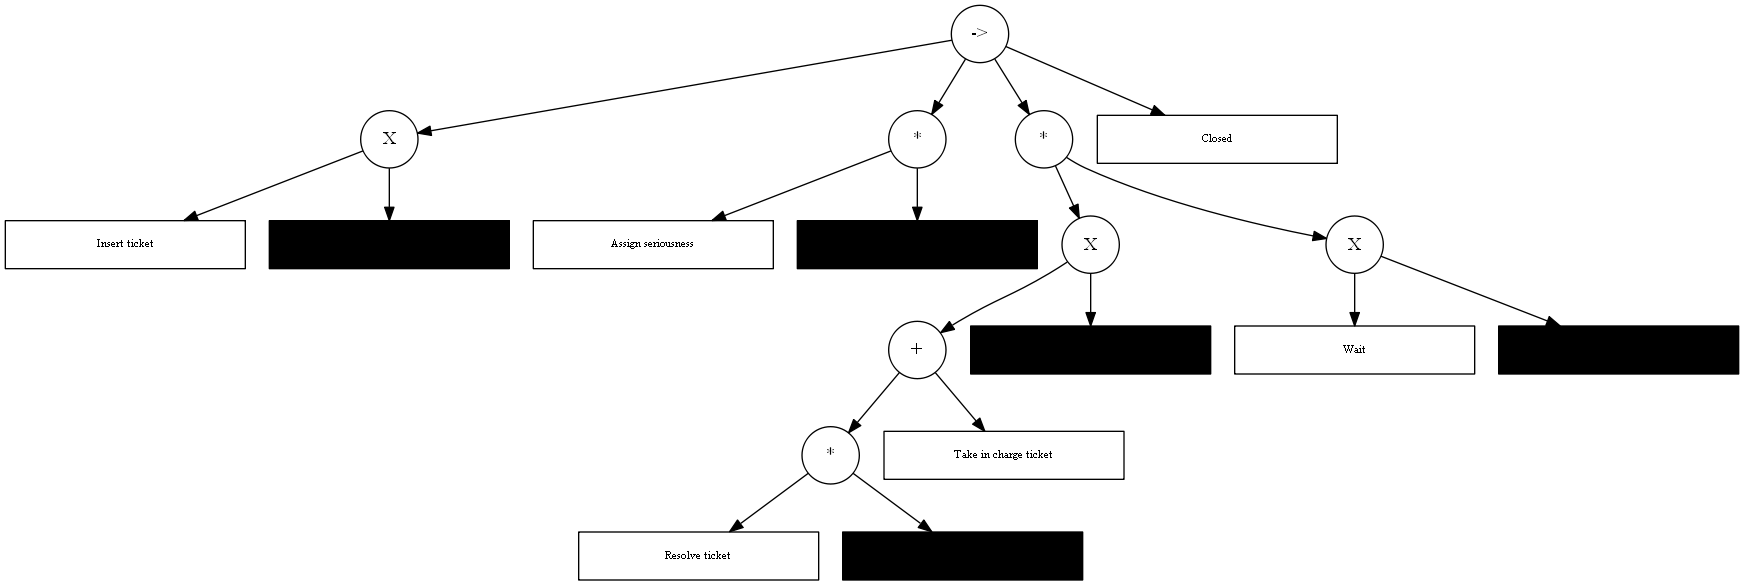

->( X( Insert ticket, τ ), *( X( Assign seriousness ), τ ), *( X( +( *( X( Resolve ticket ), τ ), Take in charge ticket ), τ ), X( Wait, τ ) ), Closed )

In [13]:
# Your code
# filtered_log
# Mining for a process tree
from pm4py.algo.discovery.inductive import factory as inductive_miner
from pm4py.visualization.process_tree import factory as pt_vis_factory


tree = inductive_miner.apply_tree(filtered_log)
gviz = pt_vis_factory.apply(tree)
pt_vis_factory.view(gviz)
tree

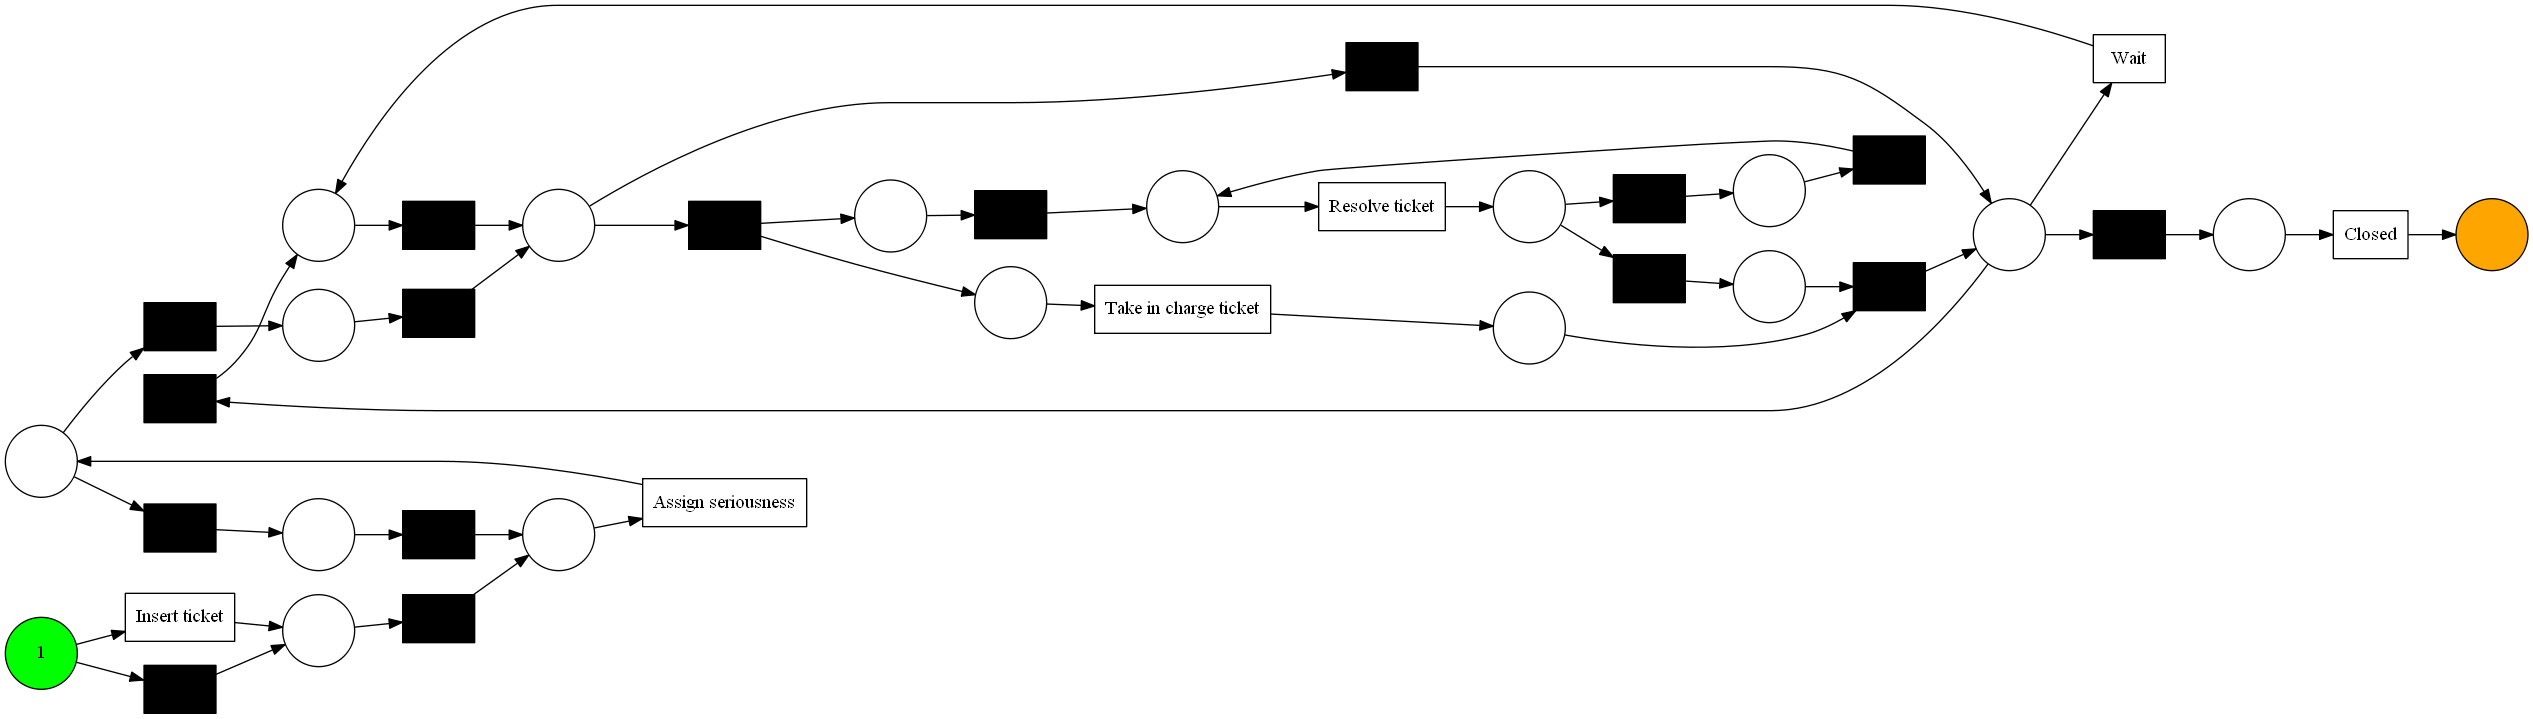

In [14]:
# Mining for a Petri net
from pm4py.visualization.petrinet import factory as pn_vis_factory

net, initial_marking, final_marking = inductive_miner.apply(filtered_log)
gviz = pn_vis_factory.apply(net, initial_marking, final_marking)
pn_vis_factory.view(gviz)

(d) Perform the token replay conformance checking using your discovered model (c) and the original event log. Does your process model fit the log?


In [15]:
# Your code
# Computing trace fitness for orginal event log
from pm4py.algo.conformance.tokenreplay import factory as token_based_replay_factory
from collections import Counter
token_replay_result = token_based_replay_factory.apply(log, net, initial_marking, final_marking)
fit = []
print(token_replay_result[0])

# find how many traces are fit and not fit to the model
for n in token_replay_result:
    fit.append(n["trace_is_fit"])
fit = Counter(fit)
fit

{'trace_is_fit': False, 'trace_fitness': 0.9375, 'activated_transitions': [skip_1, init_loop_2, Assign seriousness, skip_5, init_loop_6, tauSplit_8, Take in charge ticket, Take in charge ticket, init_loop_10, Resolve ticket, skip_13, tauJoin_9, skip_16, Closed], 'reached_marking': ['p_17:1', 'sink:1'], 'enabled_transitions_in_marking': set(), 'transitions_with_problems': [Take in charge ticket], 'missing_tokens': 1, 'consumed_tokens': 16, 'remaining_tokens': 1, 'produced_tokens': 16}


Counter({False: 1591, True: 2989})

Explanation:

    No, the process model doesn't fit the log. The result of tokens shows that traces are not completely fit to the model. Overall we can see from above Counter that we have 1591 traces that not fit perfectly to the model.
        

(e) Calculate the fitness of the model in (c).

In [16]:
# Your code
# Computing log fitness
from pm4py.evaluation.replay_fitness import factory as replay_fitness_factory
from pm4py.evaluation import factory as evaluation_factory

# Calculate fitness
fitness_tokenbasedreplay = replay_fitness_factory.apply(log, net, initial_marking, final_marking,variant="token_replay")
print(fitness_tokenbasedreplay)


{'perc_fit_traces': 65.04366812227074, 'average_trace_fitness': 0.9712962145948477, 'log_fitness': 0.970673957266246}


(f) Are there any deviations between the process model and the event log? If so, where and why?

Explanation: 

    Yes. For below we collect all the transition with problems and we found out most deviations happends in [wait].For all 130 variants that has "Wait" activity, 128 of them are filtered out. Also from the petri net we can see that wait will never reached since "take in charge ticket" need to wait for "resolve tickets". So when we apply the original log to the model, the deviations will happends there.  

In [20]:
# this function helps to count the number of act appears in a list variants, it return a number
def find_activity_in_variants(act, list_variants):
    n = 0 
    for i in list_variants:
        i = i.split(",")
        if act in list(i):
            n +=1
    return n
    
twp = []
# find what is transition with problems and count which happened the most 
for n in token_replay_result:
    twp.append(str(n["transitions_with_problems"]))
twp = Counter(twp)
print(twp.most_common()[:3])

total_wait_in_filtered_variants = find_activity_in_variants("Wait",filtered_variants)
total_wait_in_keep_variants =  find_activity_in_variants("Wait",keep_variants)
print("Total length of filtered variants is:", len(filtered_variants))
print("Total_wait_in_filtered_variants:", total_wait_in_filtered_variants)
print("Total length of keep variants is:", len(keep_variants), "\nTotal_wait_in_keep_variants:",total_wait_in_keep_variants)

[('[]', 2989), ('[Wait]', 1039), ('[Closed]', 300)]
Total length of filtered variants is: 217
Total_wait_in_filtered_variants: 128
Total length of keep variants is: 9 
Total_wait_in_keep_variants: 2


(g) Now use the original event log and remove the two most frequent variants, and discover the model based on your new event log (the filtered log without two most frequent variants).


In [23]:
# take out the two most frequent variants
filtered_variants2 = [variants_count[0]["variant"]] +[ variants_count[1]["variant"]]
print("Two most frequent variants:\n",filtered_variants2)

#filtered variants by applying filter apply
filtered_log2 = variants_filter.apply(log,filtered_variants2,parameters={"positive": False})

#check whether it does the filter fuction
variants2 = variants_filter.get_variants(filtered_log2)
    
print("Length of new event log:",len(filtered_log2))


Two most frequent variants:
 ['Assign seriousness,Take in charge ticket,Resolve ticket,Closed', 'Assign seriousness,Take in charge ticket,Wait,Resolve ticket,Closed']
Length of new event log: 1662


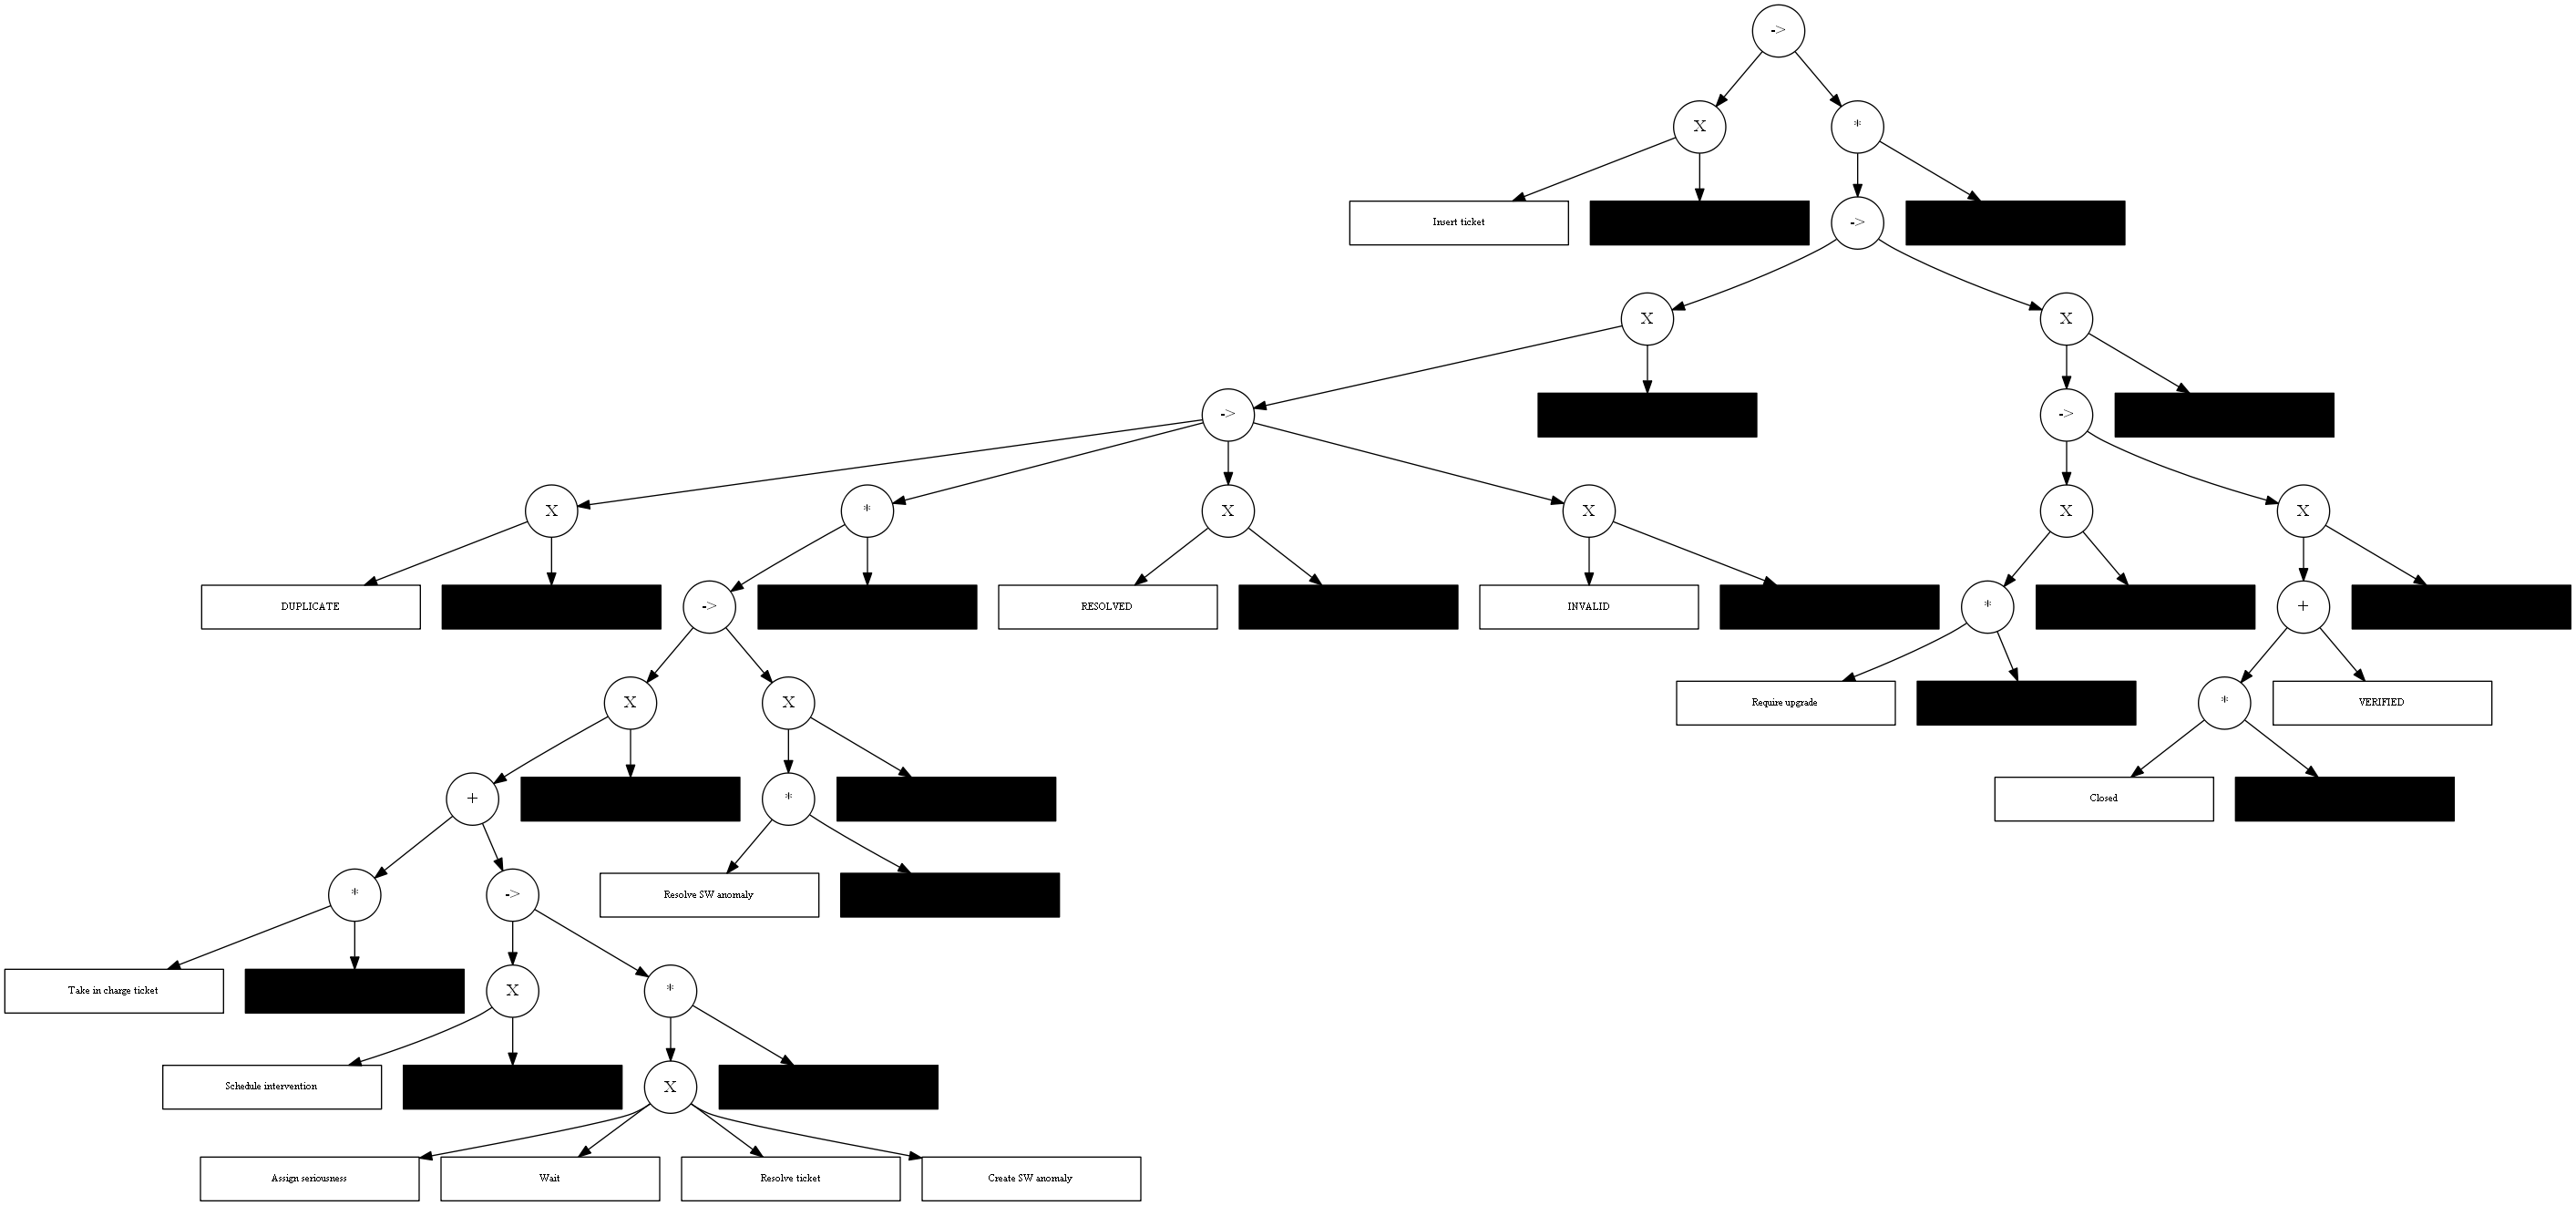

In [24]:
# Mining for a process tree
from pm4py.algo.discovery.inductive import factory as inductive_miner
from pm4py.visualization.process_tree import factory as pt_vis_factory


tree2 = inductive_miner.apply_tree(filtered_log2)
gviz_tree2 = pt_vis_factory.apply(tree2)
pt_vis_factory.view(gviz_tree2)

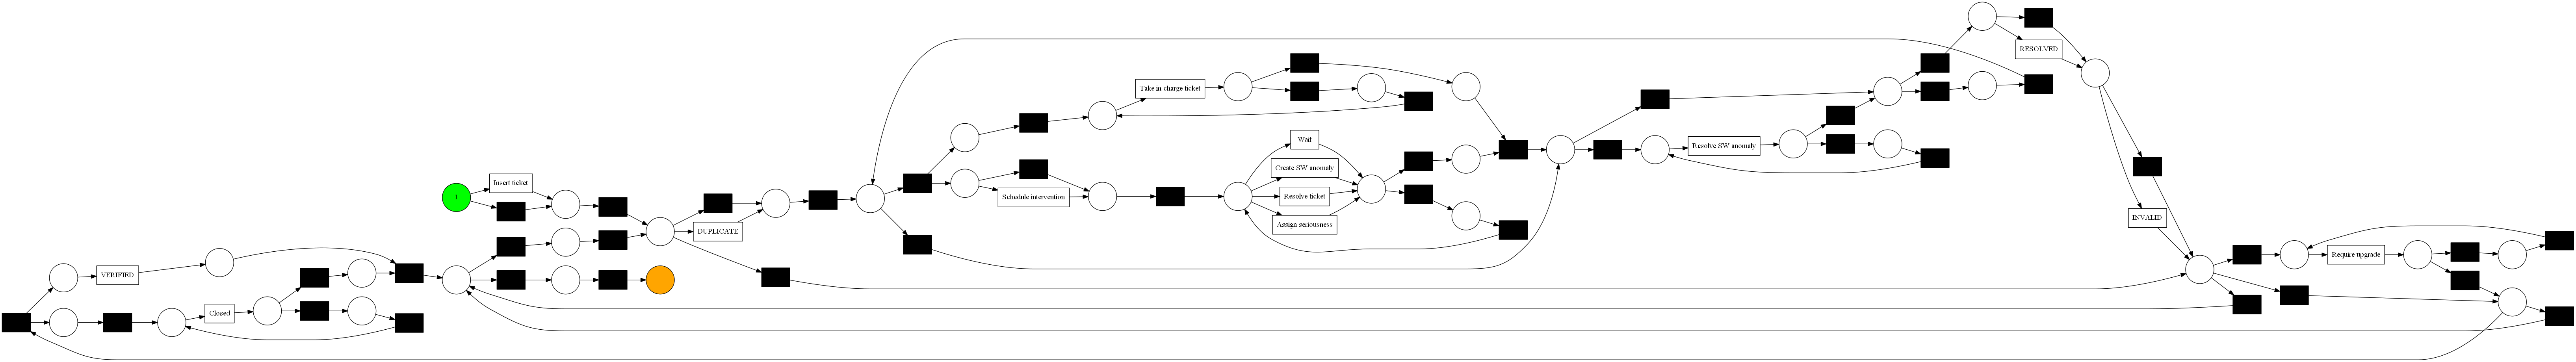

In [25]:
# Mining for a Petri net
from pm4py.visualization.petrinet import factory as pn_vis_factory

net2, initial_marking2, final_marking2 = inductive_miner.apply(filtered_log2)
gviz2 = pn_vis_factory.apply(net2, initial_marking2, final_marking2)
pn_vis_factory.view(gviz2)

(h) Perform the token replay conformance checking using the newly discovered model of question (g) and the original event log. Does your process model fit the log?

In [26]:
# Your code
# Computing trace fitness
from pm4py.algo.conformance.tokenreplay import factory as token_based_replay_factory
token_replay_result2 = token_based_replay_factory.apply(log, net2, initial_marking2, final_marking2)
print(token_replay_result2[0])

fit2 = []
# find how many traces are fit and not fit to the model
for n in token_replay_result2:
    fit2.append(n["trace_is_fit"])
fit2 = Counter(fit2)
print("\nCounter for how many traces fit to model:\n",fit2)

{'trace_is_fit': True, 'trace_fitness': 0.967741935483871, 'activated_transitions': [skip_2, init_loop_3, skip_5, init_loop_6, tauSplit_8, skip_14, init_loop_15, Assign seriousness, init_loop_10, Take in charge ticket, skip_12, loop_11, Take in charge ticket, skip_17, loop_16, Resolve ticket, skip_13, skip_18, tauJoin_9, skip_24, skip_26, skip_27, skip_28, skip_34, tauSplit_35, init_loop_37, Closed, skip_40], 'reached_marking': ['p_34:1', 'p_38:1'], 'enabled_transitions_in_marking': {VERIFIED}, 'transitions_with_problems': [], 'missing_tokens': 0, 'consumed_tokens': 29, 'remaining_tokens': 2, 'produced_tokens': 31}

Counter for how many traces fit to model:
 Counter({True: 4204, False: 376})


Explanation: 

    No. Most traces are true fit to the model but some traces are not. Although we only filtered two most frequent variants, but most of them contain the same variants.So we still have 376 traces that not fit to the model due to the large amount of traces contains these two variants have been filtered out.

(i) Calculate the fitness of the model in (g).

In [27]:
# Your code
# Computing log fitness
from pm4py.evaluation.replay_fitness import factory as replay_fitness_factory

fitness_tokenbasedreplay2 = replay_fitness_factory.apply(log, net2, initial_marking2, final_marking2,variant="token_replay")
print(fitness_tokenbasedreplay2)


{'perc_fit_traces': 0.2183406113537118, 'average_trace_fitness': 0.9605770305521291, 'log_fitness': 0.9630951715435623}


(j) Are there any deviations in the process model? If so, where and why?

Explanation: 
    
    Yes, we can see from (h) with transition with problems, among all traces not fit to the model, "Closed" appears the most. See counter below. 

In [153]:
# find what is transition with problems and count which happened the most 
twpp = []
for n in token_replay_result2:
    twpp.append(str(n["transitions_with_problems"]))
twpp = Counter(twpp)
print(twpp.most_common()[:3])


[('[]', 4204), ('[Closed]', 360), ('[Require upgrade, Closed]', 9)]


(k) Use the complete event log (original event log) and discover your process model using Inductive Miner.


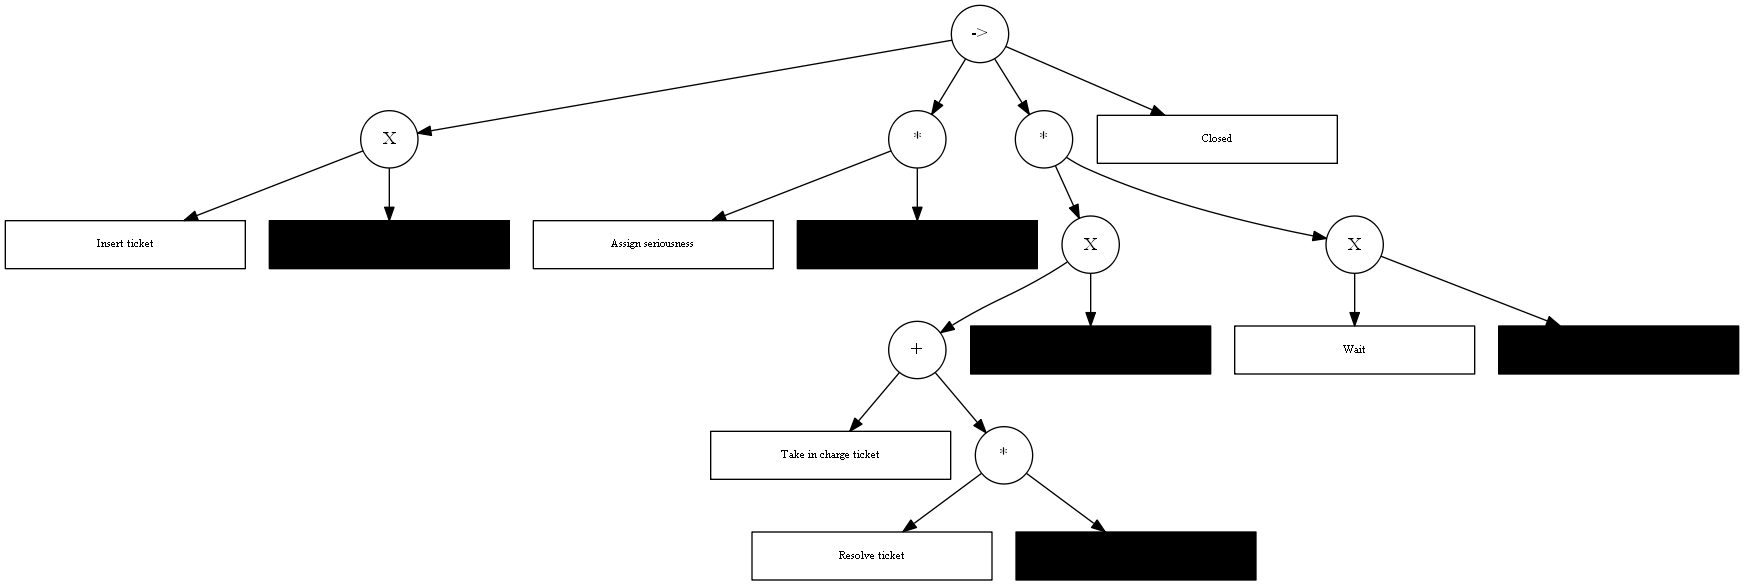

->( X( Insert ticket, τ ), *( ->( X( ->( X( DUPLICATE, τ ), *( ->( X( +( *( X( Take in charge ticket ), τ ), ->( X( Schedule intervention, τ ), *( X( Wait, Create SW anomaly, Assign seriousness, Resolve ticket ), τ ) ) ), τ ), X( *( X( Resolve SW anomaly ), τ ), τ ) ), τ ), X( RESOLVED, τ ), X( INVALID, τ ) ), τ ), X( ->( X( *( X( Require upgrade ), τ ), τ ), X( +( *( X( Closed ), τ ), VERIFIED ), τ ) ), τ ) ), τ ) )

In [154]:
# Mining for a process tree
from pm4py.algo.discovery.inductive import factory as inductive_miner
from pm4py.visualization.process_tree import factory as pt_vis_factory


tree3 = inductive_miner.apply_tree(log)
gviz3 = pt_vis_factory.apply(tree)
pt_vis_factory.view(gviz3)
tree3


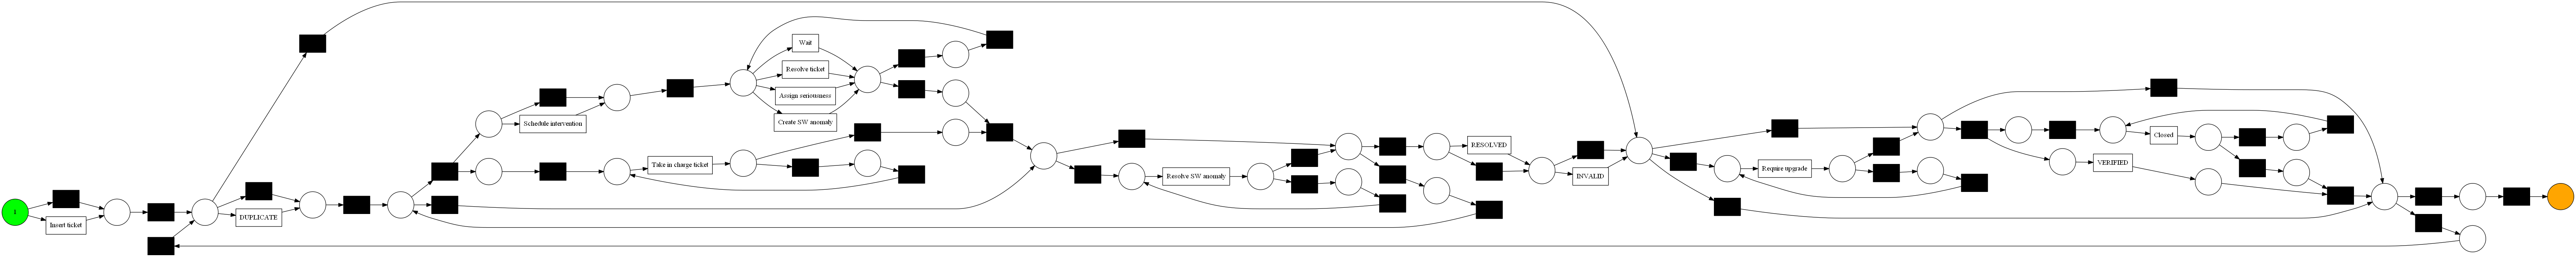

In [149]:
# Mining for a Petri net
from pm4py.visualization.petrinet import factory as pn_vis_factory

net3, initial_marking3, final_marking3 = inductive_miner.apply(log)
gviz3 = pn_vis_factory.apply(net3, initial_marking3, final_marking3)
pn_vis_factory.view(gviz3)

(l) Do the token replay conformance checking using your newly discovered model and the original event log. Does your process model fit the log?

In [159]:
# Your code
# Computing trace fitness
from pm4py.algo.conformance.tokenreplay import factory as token_based_replay_factory
token_replay_result3 = token_based_replay_factory.apply(log, net3, initial_marking3, final_marking3)

# Computing log fitness
from pm4py.evaluation.replay_fitness import factory as replay_fitness_factory

fitness_tokenbasedreplay3 = replay_fitness_factory.apply(log, net3, initial_marking3, final_marking3,variant="token_replay")
print(fitness_tokenbasedreplay3)

# find what is transition with problems and count which happened the most 
twppp = []
for n in token_replay_result3:
    twppp.append(str(n["transitions_with_problems"]))
twppp = Counter(twppp)
print("\nTransitions with problems:\n",twppp.most_common()[:3])


fit3 = []
# find how many traces are fit and not fit to the model
for n in token_replay_result3:
    fit3.append(n["trace_is_fit"])
fit3 = Counter(fit3)
print("\nCounter for how many traces fit to model:\n",fit3)


{'perc_fit_traces': 0.2183406113537118, 'average_trace_fitness': 0.9605770305521291, 'log_fitness': 0.9630951715435623}

Transitions with problems:
 [('[]', 4204), ('[Closed]', 360), ('[Require upgrade, Closed]', 9)]

Counter for how many traces fit to model:
 Counter({True: 4204, False: 376})


Explanation: 

    No, this model we find out is similar to the previous one. We think it might because that the second model only filtered two variants, and although traces contains these variants takes over half of the total traces, but it don't affect the model too much. 

(m) How are these three discovered process models different from each other? Which model is the best fitting to the original log? Why?

Explanation: 

    The first model is simpler than the second model and third model. The second and thired model are similar with almost the same data, both with 4204 traces that fit to the model. Also, the first model has better average trace fitness with lower number of traces that fit the model (T for 1591 F for 2989), however, the other two models both have a slightly lower average traces fitness but with high number of traces that fit to model.
    I would say, the first model is more fitting to the original log.Since it has higher average fitness and ......

(n) Visualize the model discovered in question (k) enriched with frequency information. Subsequently, visualize that same model enriched with performance information.

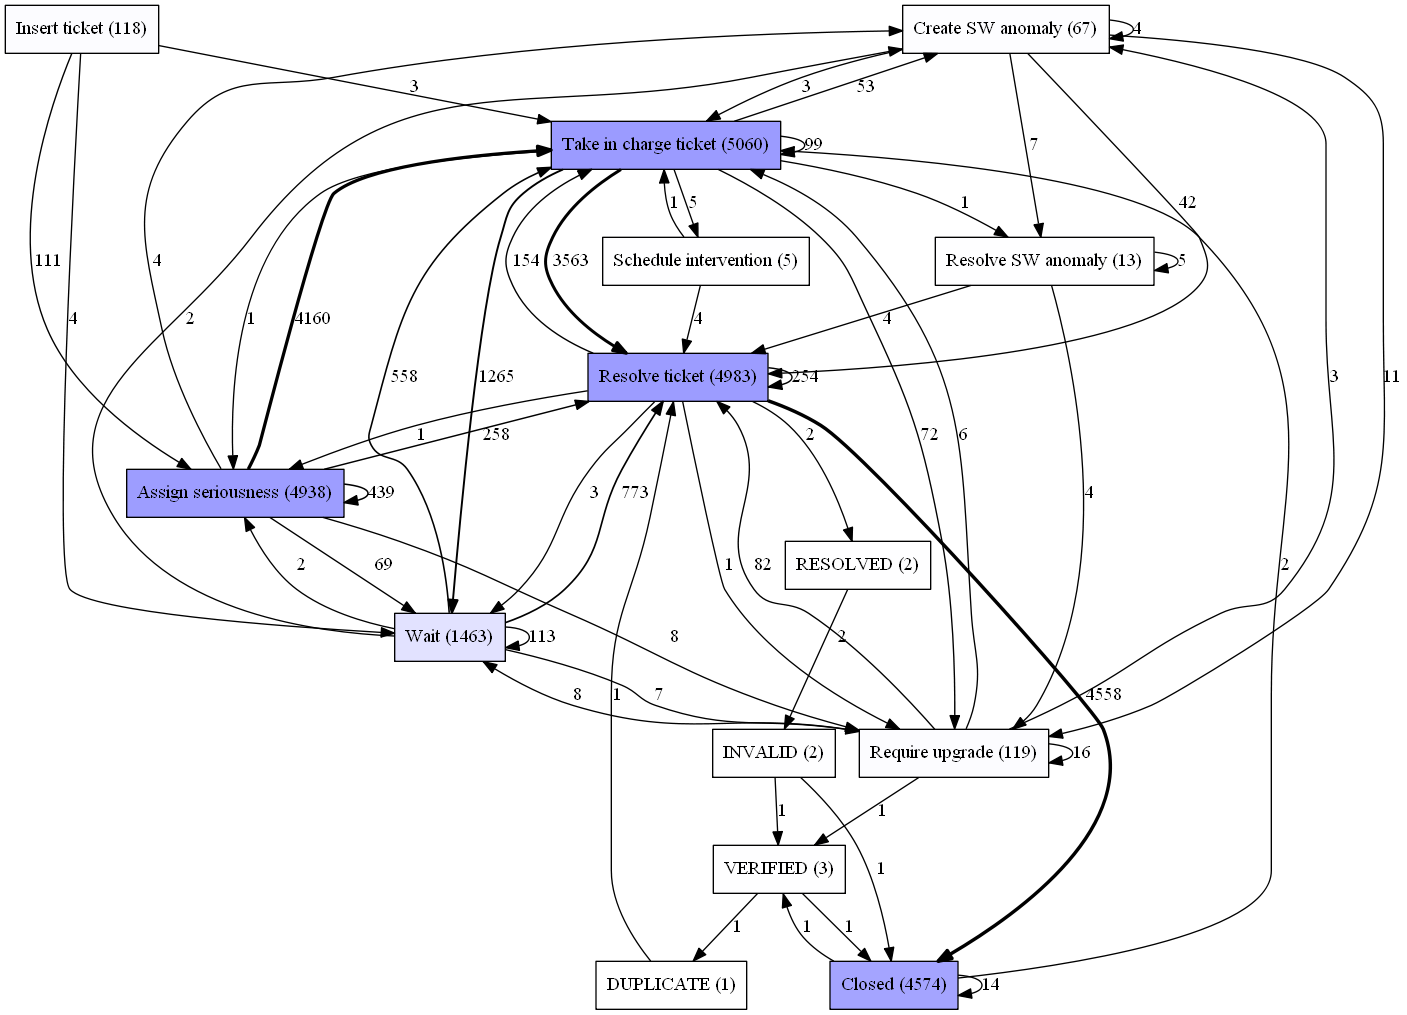

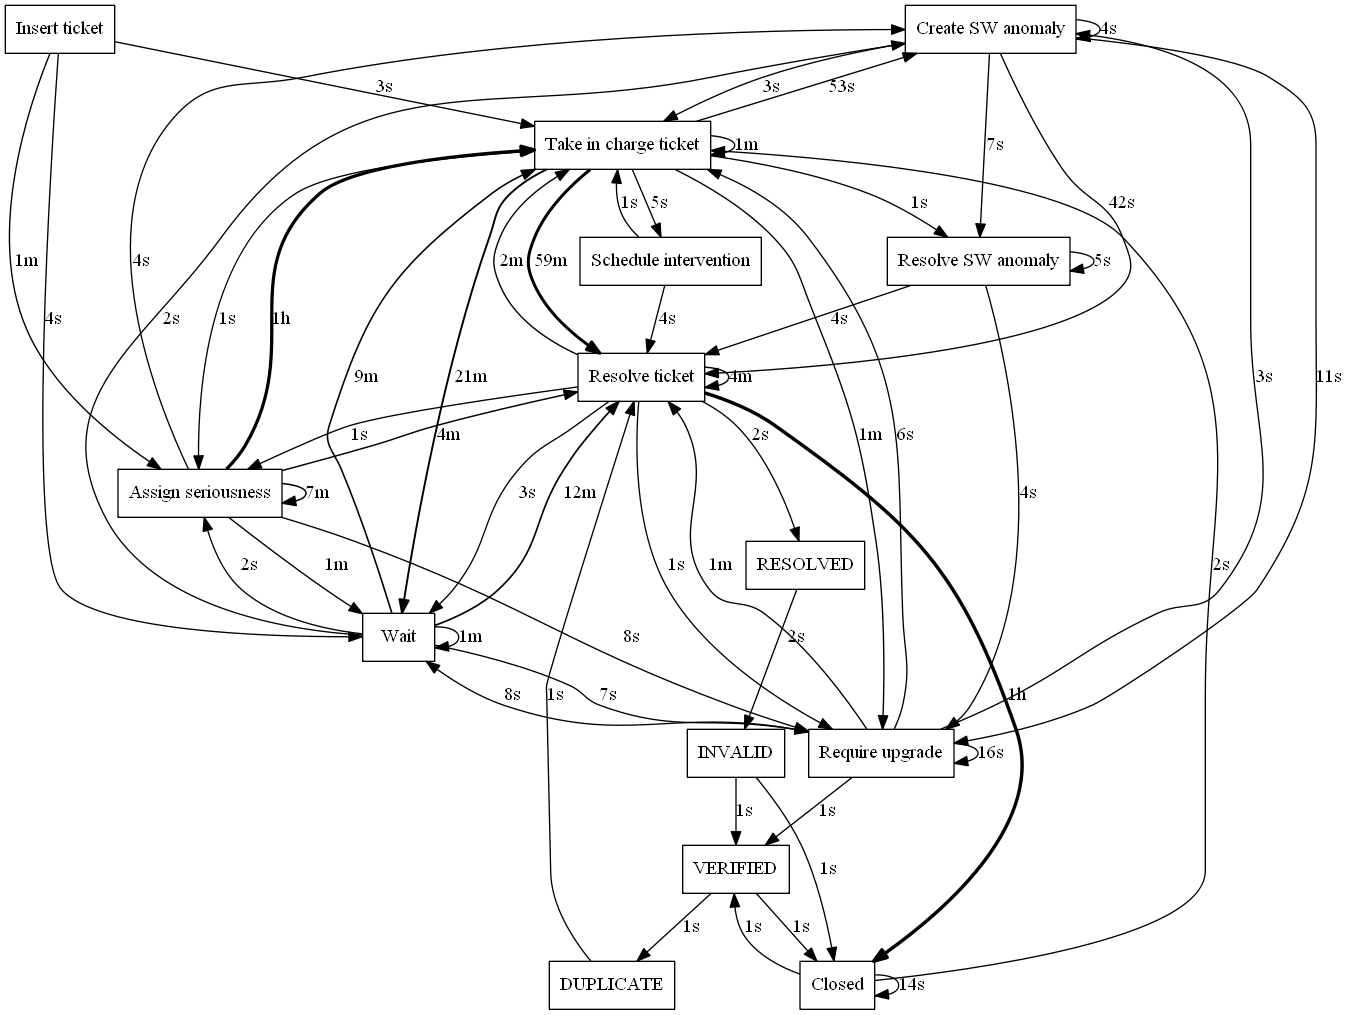

In [161]:
# Your code
# Mining for a directly-follow graph
from pm4py.algo.discovery.dfg import factory as dfg_factory

dfg3 = dfg_factory.apply(log)

# Directly-follow graph visualization
from pm4py.visualization.dfg import factory as dfg_vis_factory

#with count
gviz_dfg3 = dfg_vis_factory.apply(dfg3, log=log, variant='frequency')
dfg_vis_factory.view(gviz_dfg3)

#with time
gviz_dfg4 = dfg_vis_factory.apply(dfg3, log=log, variant='performance')
dfg_vis_factory.view(gviz_dfg4)

(o) If you were the process owner and you had more resources to hire employees, on which parts of the process would you assign them to maximize efficiency?

Explanation:  
   
    I would focus more on dark blue activities such as "Assign Seriousness","resolve ticket" and "take in charge ticket" to maximize the efficiency. Since we found more arrows in and out for these activies and they average have more cases to solve than others, which means we need to hire more employees to perform these activities.


(p) Add your further comments and considerations on the frequency and performance informations. Does the process have a "happy path", and is it shown in the enhanced process models? Where are the major bottlenecks in this process? Is there any rework?

Explanation: 

    1. Does the process have a "happy path"?  
        Based on definition, "happy path" is a path in the model followed by a large number of traces. From previous data information, we found out that paths that through -> Assign Seriousness -> Take in charge Tickets -> Resolve Tickets -> Closed takes over half of the total variants. 
        
    2. Is it shown in the enhanced process models (enriched by frequencey and performance information)?
        Yes. From the frequency and performance informations, We can see some thicker lines above followed trace-> Assign Seriousness -> Take in charge Tickets -> Resolve Tickets -> Closed, which means generally these events taken place more frequently than others. Also from the performance perspective, we can see that between events, it tends to need more time (around 1h) to pass to next stage. 
    
    3. Where are the major bottlenecks in this process? 
        The bottlenecks in this process is where the lines get thicker (time takes longer), which is [Assign Seriousness -> Take in charge Tickets],[Take in charge Tickets-> Resolve Tickets],[Resolve Tickets -> Closed]. Generally takes longer time (about an hour). 
        
    4. Is there any rework?
        From the dfg we can see that "Assign Seriousness" has repeated over 400 times. Anything that loops back to previous past state and create extra work time can be counted as rework.